# Natrual Langauage Processing Assignment 1
## CITS4012 | David Smith | 21484971

### The Task:

The project is to create a rule based, job seeker chatbot to assist a user through conversation with as they look for a job. 

This project's dataset includes job descriptions written in natural language, as well as structured data on the city, job categories, and salary scale. The job descriptions will be processed as part of the project. 

A user can enquire about various jobs, filter based on input information and review those jobs that match their description. Due to the complexity, the chat bot possesses the ability to handle multi-turn discussion. 

### Data: 

The data provided is from the the job searching website Seek.com where many companies post looking for future employees. 

The csv for Australian job listings from Seek job board has 30,000 observations and 12 variables. 

- category	
- city	
- company_name	
- geo	
- job_board	
- job_description	
- job_title	
- job_type	
- post_date	
- salary_offered	
- state	
- url

Many of these have issues in the data such as character artifacts from text encoding and missing data. 

Job description field is the variable of interest, however, giving the various ways in which people write job descriptions there are many issues in this column. 
Luckily, where the job description lacks the information, the structured fields can work to combine the information and make it usable. 



## Noteboook Flow Control


In [63]:

class FunctionsToRun: 
    ## Imports and Setups 
    download_spacy = False
    import_csv = True

    ## Import or export csv
    export_df = True
    load_df = False
    ## Data Processing
    subset =  False
    data_cleaning =  True

    ## Using Spacy
    run_spacy =  True
    export_spacy = False
    import_spacy_from_file =  not run_spacy
    
    ## Data Exploration 
    data_vis = False
    frequent_words = False
    tf_idf = False
    retokenize_nouns = False
    extract_experience = True

    ## Run test functions 
    run_tests = True

    ## Launch chatbot 
    launch_chatbot = False

    ## Base true as place holder
    true = True
functions_to_run = FunctionsToRun()


# Import & Setup Data

### Install dependencies

In [2]:
# !pip install -U 'spacy[cuda113]'

# import spacy
# spacy.prefer_gpu()


In [3]:
# !python -m spacy info

In [4]:
if functions_to_run.download_spacy:
    import spacy.cli
    spacy.cli.download("en_core_web_sm")
    spacy.cli.download("en_core_web_md")
    spacy.cli.download("en_core_web_lg")



In [5]:
!pip install pandas

### Import Core Libraries 


In [6]:
import numpy as np
import pandas as pd
import re
import spacy

### Setup figures and output 

In [7]:

## Import Graphics Libraries 
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

## Setup Colour Scheme 
sns.set_palette("tab10")
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="whitegrid", palette="pastel",  rc=custom_params)

## Allows for multiple outputs from cells without having to repeatedly write display 
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## Set the size of the plots 
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100 # Note: 200 e.g. is really fine, but slower


## Data Import and Cleaning 

### Try to convert from UTf-8

TO DO: Comment on the charcters issues 


In [8]:
if False:
    txt = "â€¢Â Permanent full time â€¢Â Manufacturing â€¢Â St Kilda Road location One in three Australians will need blood in their lifetime. At the Australian Red Cross Blood Service, weâ€™re entrusted with collecting, processing and delivering this vital supply. To view the position description or apply, please click â€˜Apply for this jobâ€™ to be directed to our website. Applications for this role close Monday, 30 April 2018 at 5:00pm. Whilst we appreciate all interest in our organisation, we regret to inform that we will not be engaging with, or accepting candidates from agencies or consulting firms on this occasion. *LI-2 "

    txt.decode("utf-8", "strict")

    def simplify(text):
        import unicodedata
        try:
            text = unicode(text, 'utf-8')
        except NameError:
            pass
        text = unicodedata.normalize('NFD', text).encode('ascii', 'ignore').decode("utf-8")
        return str(text)

    txt
    ExtractAlphanumeric(txt)


### Import CSV

In [9]:
if functions_to_run.import_csv:
    seek_data = pd.read_csv("./seek_australia.csv" )
    seek_data.head()


,category,city,company_name,geo,job_board,job_description,job_title,job_type,post_date,salary_offered,state,url
0,Retail & Consumer Products,Sydney,Frontline Executive Retail Sydney,AU,seek,Have you had 10 years experience in fresh pro...,Store Manager - Fresh Produce,Full Time,2018-04-15T23:13:45Z,$100k Base + Super + Benefits,North Shore & Northern Beaches,https://www.seek.com.au/job/35989382
1,Government & Defence,Brisbane,Powerlink,AU,seek,The Opportunity: The Client Solution Analyst ...,Client Solution Analyst,Full Time,2018-04-15T23:04:40Z,Excellent remuneration packages,Northern Suburbs,https://www.seek.com.au/job/35989272
2,Trades & Services,Sydney,Richard Jay Laundry,AU,seek,An innovative business development role for a...,Service Technician / Installer - NSW,Full Time,2018-04-15T23:04:31Z,NaN,Parramatta & Western Suburbs,https://www.seek.com.au/job/35989270
3,Trades & Services,Melbourne,Adaptalift Hyster,AU,seek,About the role: We are seeking an Automotive W...,Workshop Technician I Material Handling Equipment,Full Time,2018-04-16T03:15:17Z,NaN,Bayside & South Eastern Suburbs,https://www.seek.com.au/job/35993203
4,Trades & Services,Adelaide,Bakers Delight G&M,AU,seek,Â Early starts and weekend shifts. No experie...,APPRENTICESHIP JUNIOR BAKER,Full Time,2018-04-16T01:26:50Z,NaN,NaN,https://www.seek.com.au/job/35991578


### Subset imported data

In [10]:
if functions_to_run.subset:
    seek_data = seek_data[:5000]
    seek_data

### Remove non alpha numeric


In [11]:
from string import ascii_letters, digits, punctuation

def ExtractAlphanumeric(InputString):
    """
    Clean the string so they only contain letters, digits, and punctuation 
    """
    if type(InputString) is str:
        return "".join([ch for ch in InputString if ch in (ascii_letters + digits + punctuation + " " + "$")])
    else:
        return InputString

if functions_to_run.data_cleaning:
    ## Strip out white space from variables 
    seek_data = seek_data.apply(lambda x: x.str.strip())
    seek_data = seek_data.applymap(ExtractAlphanumeric)

    seek_data.head(5)



,category,city,company_name,geo,job_board,job_description,job_title,job_type,post_date,salary_offered,state,url
0,Retail & Consumer Products,Sydney,Frontline Executive Retail Sydney,AU,seek,Have you had 10 years experience in fresh prod...,Store Manager - Fresh Produce,Full Time,2018-04-15T23:13:45Z,$100k Base + Super + Benefits,North Shore & Northern Beaches,https://www.seek.com.au/job/35989382
1,Government & Defence,Brisbane,Powerlink,AU,seek,The Opportunity: The Client Solution Analyst p...,Client Solution Analyst,Full Time,2018-04-15T23:04:40Z,Excellent remuneration packages,Northern Suburbs,https://www.seek.com.au/job/35989272
2,Trades & Services,Sydney,Richard Jay Laundry,AU,seek,An innovative business development role for an...,Service Technician / Installer - NSW,Full Time,2018-04-15T23:04:31Z,NaN,Parramatta & Western Suburbs,https://www.seek.com.au/job/35989270
3,Trades & Services,Melbourne,Adaptalift Hyster,AU,seek,About the role: We are seeking an Automotive W...,Workshop Technician I Material Handling Equipment,Full Time,2018-04-16T03:15:17Z,NaN,Bayside & South Eastern Suburbs,https://www.seek.com.au/job/35993203
4,Trades & Services,Adelaide,Bakers Delight G&M,AU,seek,Early starts and weekend shifts. No experience...,APPRENTICESHIP JUNIOR BAKER,Full Time,2018-04-16T01:26:50Z,NaN,NaN,https://www.seek.com.au/job/35991578


### Review the data

In [12]:
## Get the unique job types. This will change the way the salary expectation is managed 
job_types = seek_data["job_type"].unique()
print ("Job Types: \n", "".join(job_types+ "\n"))  

job_categories = seek_data["category"].unique()
print ("Job Categories:\n", "\n".join(job_categories))  

job_cities = seek_data["city"].unique()
print ("Number of unique job titles:\n" , "\n".join(job_cities))


job_state = seek_data["city"].unique()
print ("Number of unique job titles:\n" , "\n".join(job_state))




Job Types: 
 Full Time
Contract/Temp
Casual/Vacation
Part Time

Job Categories:
 Retail & Consumer Products
Government & Defence
Trades & Services
Manufacturing, Transport & Logistics
Sales
Community Services & Development
Healthcare & Medical
Information & Communication Technology
Mining, Resources & Energy
Construction
Design & Architecture
Call Centre & Customer Service
Marketing & Communications
Administration & Office Support
Banking & Financial Services
Engineering
Education & Training
Accounting
Human Resources & Recruitment
Real Estate & Property
Sport & Recreation
Legal
Hospitality & Tourism
Consulting & Strategy
Farming, Animals & Conservation
Advertising, Arts & Media
Insurance & Superannuation
Self Employment
CEO & General Management
Science & Technology
Number of unique job titles:
 Sydney
Brisbane
Melbourne
Adelaide
Northam & Wheatbelt
Port Hedland, Karratha & Pilbara
Gosford & Central Coast
Newcastle, Maitland & Hunter
Gold Coast
Rockhampton & Capricorn Coast
Wollongong,

In [13]:
seek_data.describe()

,category,city,company_name,geo,job_board,job_description,job_title,job_type,post_date,salary_offered,state,url
count,30000,30000,30000,30000,30000,29655,30000,30000,30000,8952,19180,30000
unique,30,65,9054,1,1,26833,20671,4,24747,5320,19,30000
top,Trades & Services,Sydney,Private Advertiser,AU,seek,Today we have around 250 people who work to he...,Business Development Manager,Full Time,2018-04-16T09:29:00Z,"$100,502 - $114,624",CBD & Inner Suburbs,https://www.seek.com.au/job/35989382
freq,3346,9412,1491,30000,30000,101,125,20203,14,130,4690,1


## Run Spacy Pipeline

Stored in a dictionary 

In [14]:
if functions_to_run.run_spacy:
    import spacy
    from collections import Counter

    nlp = spacy.load("en_core_web_lg")


    job_des = list(map(str , seek_data["job_description"].values))
    job_index = seek_data["job_description"].index


    ## Run docs through pip 
    docs = list(nlp.pipe(job_des , disable=[]))

    doc_index_dic = { }

    ## Create a dictionary of docs using the row index
    for i , index in enumerate(job_index):
        doc_index_dic[str(index)] = docs[i]


    ## -------- LOCAL TESTS -------- ##
    tests = [3,]
    for test in tests: 
        ## Extract the index of a specific row 
        search_index = seek_data.iloc[test].name
        seek_data.iloc[test]

        ## Retrieve the doc object 
        doc = doc_index_dic[str(search_index)]

        ## Ensure spacy stuff is still there 
        for sentence in doc.sents:
            print(sentence)



category                                           Trades & Services
city                                                       Melbourne
company_name                                       Adaptalift Hyster
geo                                                               AU
job_board                                                       seek
job_description    About the role: We are seeking an Automotive W...
job_title          Workshop Technician I Material Handling Equipment
job_type                                                   Full Time
post_date                                       2018-04-16T03:15:17Z
salary_offered                                                   NaN
state                                Bayside & South Eastern Suburbs
url                             https://www.seek.com.au/job/35993203
Name: 3, dtype: object

About the role: We are seeking an Automotive Workshop Technician to join our busy Springvale workshop.
In this role you will be responsible for Pre-Delivery inspections, troubleshooting, scheduled maintenance as well as more involved technical repairs of forklifts.
 Whats on offer?
We offer above award wages in line with experience and our team members receive ongoing technical training, access to paid forklift training and certification plus onsite parking.
We have a proven track record of promoting our team members so career development is a genuine reality if youre serious about establishing your career within Material Handling.
About you: You will have a Mechanical Trade Certificate and mechanical experience including servicing and diagnostics gained in any mechanical industry.
Were looking for people with a strong commitment to safe work practices and good communication skills.
You will be no stranger to working in a fast paced environment to meet changing deadlines and enjoy work

## Export or Load Spacy Dictionary 

Pickle is terrible 

Json does not work 

Tried doc.bin but did not have success
`
Doc.to_file() only way but still takes 11mins to load 


In [15]:
## Helper functions for saving documents 
def uniquify(path):
    """
    Creates a unique path rather than overwite file 
    """
    filename, extension = os.path.splitext(path)
    counter = 1
    while os.path.exists(path):
        path = filename + " (" + str(counter) + ")" + extension
        counter += 1
    return path

In [16]:
if functions_to_run.export_spacy:
        ## Set the output path 
        path = "./data/full_data/doc"
        
        ## loop through objects and save to dictionary 
        for i in doc_index_dic.keys():
                doc_index_dic[str(i)].to_disk( uniquify(path) + str(i))


In [17]:
if functions_to_run.import_spacy_from_file:
    import os
    from spacy.tokens import Doc
    from spacy.vocab import Vocab

    ## Path to exported spacy docs 
    path = "./data/full_data/doc"
    directory = os.fsencode(path)

    doc_index_dic = {}

    for index in seek_data.index:
        doc = Doc(Vocab()).from_disk(path + str(index))
        doc_index_dic [str(index)] = doc

    ## --Test the import worked -- 
    ## Retrieve the doc object 
    doc = doc_index_dic [str(search_index)]

    ## Ensure spacy stuff is still there 
    for sentence in doc.sents:
        print(sentence)


#### Pickle Exporter

In [18]:
if False:
    import io, json, os
    import pickle 

    def save_object(obj, filename):
        with open(filename, 'wb') as outp:  # Overwrites any existing file.
            pickle.dump(obj, outp, pickle.HIGHEST_PROTOCOL)
        
        path = "./data/test_spacy_data.text"
        with io.open( uniquify(path), 'w', encoding='utf-8') as f:
            f.write(json.dumps(doc_index_dic.__dict__, ensure_ascii=False))

    # sample usage
    path = "./data/test_spacy_data.pkl"
    save_object(doc_index_dic,  uniquify(path))




#### Pickle Importer

In [19]:
if False:
    import pickle
    
    path = "./data/spacy_data_full.pkl"

    with open(path, 'rb') as inp:
        doc_index_dic = pickle.load(inp  )
    
    ### ---- CHECK TO SEE IF SPACY OBJ STILL WORKING 
    ## Extract the index of a specific row 
    search_index = seek_data.iloc[3].name
    seek_data.iloc[3]
    
    ## Retrieve the doc object 
    doc = doc_index_dic[str(search_index)]
    
    ## Ensure spacy stuff is still there 
    for sentence in doc.sents:
        print(sentence)

#### DocBin Attempt

In [20]:
if False:
    import spacy
    from spacy.tokens import DocBin

    doc_bin = DocBin(attrs=["LEMMA", "ENT_IOB", "ENT_TYPE"], store_user_data=True)
    texts = ["Some text", "Lots of texts...", "..."]
    nlp = spacy.load("en_core_web_sm")
    for doc in nlp.pipe(texts):
        doc_bin.add(doc)
    bytes_data = doc_bin.to_bytes()

    # Deserialize later, e.g. in a new process
    nlp = spacy.blank("en")
    doc_bin = DocBin().from_bytes(bytes_data)
    docs = list(doc_bin.get_docs(nlp.vocab))

### Load for retokenizer dictionary

In [21]:
nlp = spacy.load("en_core_web_lg")

import os
from spacy.tokens import Doc
from spacy.vocab import Vocab
## Path to exported spacy docs 
path = "./data/full_data/doc"
directory = os.fsencode(path)

import_spacy_dict = {}

for index in seek_data.index:
    doc = Doc(nlp.vocab).from_disk(path + str(index))
    import_spacy_dict  [str(index)] = doc

## Retrieve the doc object 
doc = import_spacy_dict  [str(search_index)]

## Ensure spacy stuff is still there 
for sentence in doc.sents:
    print(sentence)

About the role: We are seeking an Automotive Workshop Technician to join our busy Springvale workshop.
In this role you will be responsible for Pre-Delivery inspections, troubleshooting, scheduled maintenance as well as more involved technical repairs of forklifts.
 Whats on offer?
We offer above award wages in line with experience and our team members receive ongoing technical training, access to paid forklift training and certification plus onsite parking.
We have a proven track record of promoting our team members so career development is a genuine reality if youre serious about establishing your career within Material Handling.
About you: You will have a Mechanical Trade Certificate and mechanical experience including servicing and diagnostics gained in any mechanical industry.
Were looking for people with a strong commitment to safe work practices and good communication skills.
You will be no stranger to working in a fast paced environment to meet changing deadlines and enjoy work

# Data Exploration



### Plot Jobs by Category for each City 

In [22]:
def job_category_by_city_heatmap(df):
    """
    
    """
    dt_map = df.groupby(["category", "city"]).size().unstack().fillna(0)

    g = sns.heatmap(dt_map.transpose(),  cmap="mako" )
    var = g.set_title(
        "\nNumber of Jobs by Category for each City\n",     
        fontsize=18
    )

if functions_to_run.data_vis:
    job_category_by_city_heatmap(seek_data)

In [23]:
def filter_df( df , column , list_to_match ):
    """
    
    """
    matches = []
    for city in seek_data[column].tolist():
        if city.lower() in list_to_match:
            matches.append(True)
        else:
            matches.append(False)
    return df[matches]
    
if functions_to_run.data_vis:
    df = filter_df(seek_data , "city" , ["act", "adeleide", "darwin", "brisbane", "perth" , "melbourne", "sydney"  ])
    job_category_by_city_heatmap(df)

# seek_data.City 

### Plotting number of jobs around Australia by Job Category 

In [24]:
job_type_to_filter = "Accounting"

def number_jobs_by_city(data_frame , title):
    """
    
    """
    ## Group and sort the data by count 
    cities_order = data_frame.groupby("city").size().reset_index(name='count').sort_values(['count'], ascending=False)

    ## Create new plot
    var = plt.figure() 
    ## Plot the data for the top ten values 
    g = sns.barplot(data=cities_order[0:10] , x="city", y="count")
    var = g.set_title(
        title
    )
    var = plt.xticks(rotation=90)
    var = plt.tight_layout()
    var = plt.plot()


def find_number_of_jobs_by_category(df , job_type):
    """
    
    """
    #reshape DataFrame from wide format to long format
    df = df[ df.category == job_type]
    number_jobs_by_city(df, "Number of {0} jobs by Cities".format(job_type))
    df = pd.melt(df, id_vars='category', value_vars=['city',])
    return df.groupby(["category", "value"]).size()


if functions_to_run.data_vis:
    find_number_of_jobs_by_category(seek_data , job_type_to_filter)

### Plotting Number of Jobs for a City 

In [25]:
job_city_to_filter = "Perth"

def number_jobs_by_city (data_frame , title):
    """
    
    """
    ## Group and sort the data by count 
    cities_order = data_frame.groupby("category").size().reset_index(name='count').sort_values(['count'], ascending=False)

    ## Create new plot
    var = plt.figure() 
    ## Plot the data for the top ten values 
    g = sns.barplot(data=cities_order[0:10] , x="category", y="count")
    var = g.set_title(
        title
    )
    var = plt.xticks(rotation=90)
    var = plt.tight_layout()
    var = plt.plot()


def find_number_of_jobs_by_city(df , job_city):
    """
    
    """
    #reshape DataFrame from wide format to long format
    df = df[ df.city == job_city]
    number_jobs_by_city(df, "Number of Jobs in {}".format(job_city))
    df = pd.melt(df, id_vars='city', value_vars=['category',])
    return df.groupby(["city", "value"]).size()


if functions_to_run.data_vis:
    find_number_of_jobs_by_city(seek_data , job_city_to_filter)

In [26]:
if functions_to_run.data_vis:
    #reshape DataFrame from wide format to long format
    df = pd.melt(seek_data, id_vars='city', value_vars=['category',])

    df_group = df.groupby(["city", "value"]).size()

    print(df_group)

### Number of Jobs Advertised by Category 

In [27]:

def number_jobs_by_category(data_frame):
    """"
    Creates a plot for the number of jobs advertised by category 
    Input: dataframe to serch by 
    """
    ## Group data and sort order by number of observations 
    category_order = data_frame.groupby("category")\
                                .size()\
                                .reset_index(name='obs')\
                                .sort_values(['obs'], ascending=False)

    ## Create new plot
    var = plt.figure() 
    g = sns.barplot(data=category_order, x="category", y="obs")
    var = g.set_title(
        "Job Categories by Number of Jobs Advertised"
    )
    var = plt.xticks(rotation=90)
    var = plt.tight_layout()
    var = plt.plot()

if functions_to_run.data_vis:
    number_jobs_by_category(seek_data)

### Number of Jobs Advertised by City (Top 10)

In [28]:

def number_jobs_by_city(data_frame):
    ## Group and sort the data by count 
    cities_order = data_frame.groupby("city").size().reset_index(name='obs').sort_values(['obs'], ascending=False)

    ## Create new plot
    var = plt.figure() 
    ## Plot the data for the top ten values 
    g = sns.barplot(data=cities_order[0:10] , x="city", y="obs")
    var = g.set_title(
        "Top Ten Cities for Number of Jobs Advertised"
    )
    var = plt.xticks(rotation=90)
    var = plt.tight_layout()
    var = plt.plot()

if functions_to_run.data_vis:
    number_jobs_by_city(seek_data)

### Word frequency by City 


In [29]:
import nltk
from nltk.probability import FreqDist
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

def word_freq_by_filter_and_value(df,  filter,  number_of_words, specific_value):
    """
    Creates a word frequency plot for a given column filter and top N and number of words to return 
    """
    job_des = []
    for i , row in seek_data[seek_data[filter] == specific_value].iterrows():
        job_des.append(str(row.job_description))
    corpus = " ".join(job_des)

    tokens = word_tokenize(corpus )
    words = [word.lower() for word in tokens if word.isalpha() == True and word not  in stopwords.words('english')]
    # print(len(data))
    fdist1 = FreqDist( words )

    plot_df = pd.DataFrame( {"Word": fdist1.keys(), "Count": fdist1.values() }).sort_values(by=["Count"] , ascending=False)

    ## Create new plot
    var = plt.figure() ## by parsing to var text does not display 
    g = sns.barplot(data=plot_df[:50] , x="Word", y="Count")
    var = g.set_title(
        "Word frequency distribution in {0} (Top {1})".format(specific_value , number_of_words) , 
    )
    var = plt.xticks(rotation=90)
    var = plt.tight_layout()
    var = plt.plot()

In [30]:
city_to_filter = "Perth"

if functions_to_run.data_vis:
    word_freq_by_filter_and_value(seek_data,  "city",  50, city_to_filter)


### Word Frequency by Job Category 

In [31]:
category_to_filter = "Healthcare & Medical"

if functions_to_run.data_vis:
        word_freq_by_filter_and_value(seek_data,  "category",  50, category_to_filter )

## Word frequency distribution in job descriptions 

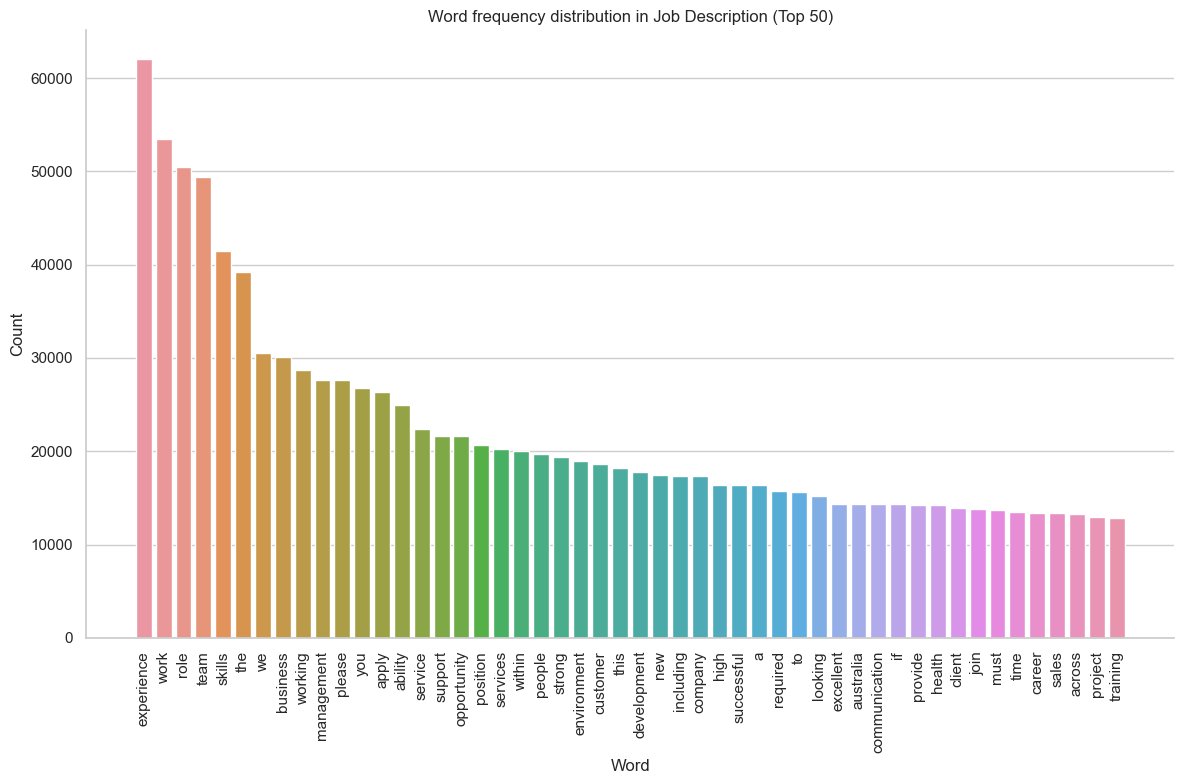

In [32]:
from IPython import display
display.Image("./img/word_frequency_in_JobDes.png")
if False:
# if functions_to_run.data_vis:
  
    job_des = [str(job_des) for job_des in seek_data["job_description"]]
    corpus = " ".join(job_des)

    tokens = word_tokenize(corpus )
    words = [word.lower() for word in tokens if word.isalpha() == True and word not  in stopwords.words('english')]
    print(len(data))
    fdist1 = FreqDist( words )

    plot_df = pd.DataFrame( {"Word": fdist1.keys(), "Count": fdist1.values() }).sort_values(by=["Count"] , ascending=False)

    ## Create new plot
    var = plt.figure() ## by parsing to var text does not display 
    g = sns.barplot(data=plot_df[:50] , x="Word", y="Count")
    var = g.set_title(
        "Word frequency distribution in {0} (Top {1})".format("Job Description" , 50) , 
    )
    var = plt.xticks(rotation=90)
    var = plt.tight_layout()
    var = plt.plot()

# Data Preprocessing




## Get the vocab counts 


In [33]:
import gensim
seek_data["text_cleaned"] = seek_data["job_description"].apply(lambda x: gensim.utils.simple_preprocess(str(x)))
seek_data["text_cleaned"] 

0        [have, you, had, years, experience, in, fresh,...
1        [the, opportunity, the, client, solution, anal...
2        [an, innovative, business, development, role, ...
3        [about, the, role, we, are, seeking, an, autom...
4        [early, starts, and, weekend, shifts, no, expe...
                               ...                        
29995    [hotel, snapshot, the, radisson, blu, plaza, s...
29996    [the, organisation, airservices, is, governmen...
29997    [about, the, company, and, role, our, client, ...
29998    [long, term, contract, for, months, with, poss...
29999    [customer, service, representative, west, wyal...
Name: text_cleaned, Length: 30000, dtype: object

In [34]:
import nltk
import gensim
from nltk.stem import 	WordNetLemmatizer, SnowballStemmer , PorterStemmer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

## Setup stemming lemmatizer functions
snowball_stemmer = SnowballStemmer(language='english')
porter_stemmer = PorterStemmer()
wordnet_lemmatizer = WordNetLemmatizer()

## Create corpus
corpus = "".join([str(row["text_cleaned"]) for i, row in seek_data.iterrows()])
  
## Create a list of generic stopwords 
stop_words = set(stopwords.words('english'))

## Initialize lists 
words = []
lemmas = []
merged = []
porter = []
snowball = []
non_stop_words = []

## Use filters to get words, lemmas, etc\
word_tokens = word_tokenize(corpus)
for w in word_tokens:
        words.append(w)
        if w not in stop_words:
            non_stop_words.append(w)
        lemmas.append(wordnet_lemmatizer.lemmatize(w))
        porter.append(porter.append(porter_stemmer .stem(w)))
        snowball.append(snowball.append(snowball_stemmer.stem(w)))



## Print vocab size 
print("Words Count:" , len(set(words)))
print("Lemmas Count" , len(set(lemmas)))
print("porter Count" , len(set(porter)))
print("snowball Count" , len(set(snowball)))
print("Non Stop Words Count " , len(set(non_stop_words)))


Words Count: 63853
Lemmas Count 63853
porter Count 50569
snowball Count 50926
Non Stop Words Count  63850


In [35]:
## Length of Noun Chunks
chunks = []
for key, spacy_doc in doc_index_dic.items():
    for nouns_chunk in spacy_doc.noun_chunks:
        # if nouns_chunk not in chunks:
            # if int(key) < 5:
            #     print(nouns_chunk)
            chunks.append(nouns_chunk.text)  
print("Noun Chunk Length: " , len(set(chunks)))

## Ensure only singular 
for chunk in list(set(chunks)):
    if chunk == "that":
        print("FOUND")

Noun Chunk Length:  514540
FOUND


### Count most frequent word in a doc SpaCy


In [36]:
if functions_to_run.frequent_words:
    import spacy
    from collections import Counter

    # five most common tokens
    word_freq = Counter(words)
    common_words = word_freq.most_common(20)
    print("Most Common Words: \n" , common_words)

    # five most common non_stop_words
    noun_freq = Counter(non_stop_words)
    common_words = noun_freq.most_common(20)
    print("Most Common Non Stop Words: \n" , common_words)

    # five most common noun tokens
    noun_freq = Counter(chunks)
    common_nouns = noun_freq.most_common(20)
    print("Most Common Non Stop Words: \n" , common_nouns)

### Retokenize Noun Chunks


As spaCy docs are objects, by updating their them in a function you are updating the original object. As such, I am tokenizing the text to ensure that there are no issues after retokenizing has run.

In [37]:
## Retokenizing function 
def noun_chunk_retokenizer(_doc):
    """
    Retokenizes the documents to merge noun phrases
    """
    with _doc.retokenize() as retokenizer:
        for chunk in _doc.noun_chunks:
             retokenizer.merge(chunk)
    return _doc

retokenized_spacy_dict = {}
if functions_to_run.retokenize_nouns:
    for key, spacy_doc in import_spacy_dict .items():
        merged_docs = noun_chunk_retokenizer(spacy_doc.doc)
        retokenized_spacy_dict[key] = merged_docs
        merged += [token for token in merged_docs]



## TF-IDF Implemenetaiton 


Document Frequency (dft) is defined as the number of documents in the collection that contain a term.

Inverse Document Frequency (IDF) gives a bonus to words that appear frequently in a document but not across the full document collection. 
Essentially, a higher document frequency works against a word's rating.

The TF-IDF allows as to remove stop words and make similarity comparisons between documents. This can be used in ranking the users outputs or in classifying a piece of text across different categories. 

### Remove Stop Words & Place in Column

I am using the TF-IDF process to remove stop words and words that provide little meaning to text differentiation. The remaining words are then stored in a column within the dataframe. 


### TF-IDF by Category 

In [38]:
if functions_to_run.tf_idf:
    import gensim
    import gensim.downloader as api
    from gensim.models import TfidfModel
    from gensim.corpora import Dictionary
    import numpy as np
    import pandas as pd

    tfidf_dic = {}

    for cat in seek_data.category.unique():
        filtered_df = seek_data[seek_data.category == cat]
        
        # filtered_df
        text = []
        row_indexes = []
        for index , row in filtered_df.iterrows():
            row_indexes.append(index)
            text.append(str(row.job_description))
        # for value in filtered_df.job_description.values:
            ## array of words for each row
        ## join rows for BoW corpus for each category 
        BoW_corpus = " ".join(text)

        def sent_to_words(sentences):
            for sentence in sentences:
                # deacc=True removes punctuations
                yield(gensim.utils.simple_preprocess(str(sentence), deacc=True)) 

        doc_tokenized = list(sent_to_words(text))
        
        
        dictionary = Dictionary()
        BoW_corpus = [dictionary.doc2bow(doc, allow_update=True) for doc in doc_tokenized]

        tfidf = TfidfModel(BoW_corpus, smartirs='ntc')

        vocab = [dictionary[i] for i in range(len(dictionary))]
        index = list(range(len(BoW_corpus)))
    
        df = pd.DataFrame(data=np.zeros((len(BoW_corpus), len(vocab)), dtype=np.float16),
                        index=index,
                        columns=vocab)
        
        for idx in index:
            for id, freq in tfidf[BoW_corpus[idx]]:
                df[dictionary[id]][idx] = freq

        ## Get the words in the df 
        words = df.columns

        ## add words to new words in the seek data frame 
        for i , row  in enumerate(df.values):
                ## get the original index
                index = row_indexes[i] 
                seek_data.at[index, "filtered_words"] =  " , ".join(words[row > 0.05])
        

    seek_data[["job_title","job_description" , "filtered_words"]]
        


### TF-IDF by Noun Chunks 

In [39]:
if functions_to_run.tf_idf:
    import gensim
    import gensim.downloader as api
    from gensim.models import TfidfModel
    from gensim.corpora import Dictionary
    import numpy as np
    import pandas as pd

    tfidf_dic = {}

    for cat in seek_data.category.unique():
        filtered_df = seek_data[seek_data.category == cat]
        
        ## Get spaCy objs from dictionary 
        text = []
        row_indexes = []
        for index , row in filtered_df.iterrows():
            row_indexes.append(index)
            spacy_obs = retokenized_spacy_dict[str(index)]
            chunks = []
            for token in spacy_obs.noun_chunks:
                chunks.append(str(token.text))
            joined_chunks = " ".join(chunks)
            text.append(joined_chunks)        
        BoW_corpus = " ".join(text)
        # filtered_df
        # print(text)

        def sent_to_words(sentences):
            for sentence in sentences:
                # deacc=True removes punctuations
                yield(gensim.utils.simple_preprocess(str(sentence), deacc=True)) 

        doc_tokenized = list(sent_to_words(text))
        
        
        dictionary = Dictionary()
        BoW_corpus = [dictionary.doc2bow(doc, allow_update=True) for doc in doc_tokenized]

        tfidf = TfidfModel(BoW_corpus, smartirs='ntc')

        vocab = [dictionary[i] for i in range(len(dictionary))]
        index = list(range(len(BoW_corpus)))
    
        df = pd.DataFrame(data=np.zeros((len(BoW_corpus), len(vocab)), dtype=np.float16),
                        index=index,
                        columns=vocab)
        
        for idx in index:
            for id, freq in tfidf[BoW_corpus[idx]]:
                df[dictionary[id]][idx] = freq

        words = df.columns

        # add words to new words in the seek data frame 
        for i , row  in enumerate(df.values):
                # get the original index
                index = row_indexes[i] 
                # print("index: " , index  ,"i " ,i)
                output =  " , ".join(words[row > 0.02])
                seek_data.at[index, "filtered_noun_chunks"] = output

    seek_data[["job_title","job_description" , "filtered_noun_chunks"]]

## Utility Functions

#### Def parse int function

In [40]:
def parse_int(string):
    """
    Convert text and strings to ints
    """
    try:
        return int(string)
    except:
        ONES = {'zero': 0,
                'one': 1,
                'two': 2,
                'three': 3,
                'four': 4,
                'five': 5,
                'six': 6,
                'seven': 7,
                'eight': 8,
                'nine': 9,
                'ten': 10,
                'eleven': 11,
                'twelve': 12,
                'thirteen': 13,
                'fourteen': 14,
                'fifteen': 15,
                'sixteen': 16,
                'seventeen': 17,
                'eighteen': 18,
                'nineteen': 19,
                'twenty': 20,
                'thirty': 30,
                'forty': 40,
                'fifty': 50,
                'sixty': 60,
                'seventy': 70,
                'eighty': 80,
                'ninety': 90,
                }

        numbers = []
        for token in string.lower().replace('-', ' ').split(' '):
            if token in ONES:
                numbers.append(ONES[token])
            elif token == 'hundred':
                numbers[-1] *= 100
            elif token == 'thousand':
                numbers = [x * 1000 for x in numbers]
            elif token == 'million':
                numbers = [x * 1000000 for x in numbers]
        if len(numbers) > 0:
            return sum(numbers)
        else:
            return None

#### convert_int

In [41]:
from string import ascii_letters, digits, punctuation
def convert_int(value):
    if value:
            # "".join([ch for ch in value if ch in ( ascii_letters + digits)])

            # determine multiplier
            multiplier = 1
            value = value.lower().strip()
            if value.endswith('k'):
                # print(value)
                multiplier = 1000
                value = value[0:len(value)-1] # strip multiplier character
            elif value.endswith('m'):
                multiplier = 1000000
                value = value[0:len(value)-1] # strip multiplier character
            try:
                flt = float(value)
                return (flt * multiplier)
            except:
                return ""   
    else:
        return ''

## -------- LOCAL TESTS -------- ##
tests = [
    '',
    '10',
    '10K',
    '2.3K',
    '2.34K',
    '2M',
    '2.2M',
    '2.23M',
]

# use a list comprehension to call the function on all values
numbers = [convert_int(value) for value in tests]
print (numbers)

['', 10.0, 10000.0, 2300.0, 2340.0, 2000000.0, 2200000.0, 2230000.0]


## Create Experience Column

In [42]:
if functions_to_run.extract_experience:
    ## Create a copy of the seek data
    seek_copy = pd.DataFrame(seek_data)

    ## loop through the stored spacy objects by index 
    documents = []
    for i in range(len(doc_index_dic)):
        documents.append(doc_index_dic[str(i)])
    from spacy.matcher import Matcher
    from spacy import displacy

    ## initialise the matcher 
    matcher = Matcher(nlp.vocab)

    ## set up the matching patterns
    pattern = [
        [{  "POS" : "NUM", "OP": "+"}, {"IS_PUNCT":True , "OP" : "+"}, {  "POS" : "NUM", "ENT_TYPE": {"NOT_IN": ["MONEY"] },  "OP": "+"},  {"LEMMA": "year"},  {"IS_ALPHA": True, "OP":"*"}, {"LOWER": "experience"}],
        [{  "POS" : "NUM", "OP": "+"}, {"LEMMA": "year"}, {"IS_ALPHA": True, "OP":"*"}, {"LOWER": "experience"}],

    ]

    ## Add the patterns to the matcher
    matcher.add("text" , pattern)

    ## Loop through docs
    for j , doc in enumerate(documents):
        ## Find those that have experience 
        if doc.text.find("experience" ) != -1:
            ## Loop through sentences 
            for k , sents in enumerate(doc.sents):
                ## Find those with experience 
                if sents.text.lower().find("experience" ) != -1:
                    ## Run matcher on sentence 
                    matches = matcher(sents)
                    ## If match occurs 
                    if len(matches) > 0:
                        ## Sort by Length of chars (otherwise it counts words which has issues )
                        matches.sort(key = lambda x: len([char for char in x])) 
                        ## Get the longest match 
                        longest_match = matches[0]
                        ## get the text from the longest match 
                        txt = sents[longest_match[1]:longest_match[2]]
                        ## Get the number string from the start of the match 
                        number_string = sents[longest_match[1]].text
                        # print("Doc:" , j ," | ",  txt)
                        ## if this is no - 
                        if number_string.lower() == "no":
                            experience = 0
                            # print("no experience required")
                        else:
                            ## initialise experience to 0
                            experience = 0
                            try:
                                ## parse the string to int value 
                                num = int(number_string)
                                if num < 30:
                                    experience = num 
                            except:
                                ## parse the string to int value from words
                                experience = parse_int(number_string)
                            # print(experience)
                        ## Add experience to the data frame
                        seek_copy.at[j, "years_experience"] = experience

    ## View output
    df = seek_copy[["category" ,"job_description", "years_experience"]]
    df[df["years_experience"] >= 0].head(10)

,category,job_description,years_experience
0,Retail & Consumer Products,Have you had 10 years experience in fresh prod...,10.0
9,Information & Communication Technology,IT Systems Administrator Southern Sydney Subu...,4.0
14,Trades & Services,Senior Project Manager Our client is one of th...,3.0
17,Call Centre & Customer Service,Freedom Kitchens requires a highly motivated c...,2.0
18,Marketing & Communications,"As an innovative fin-tech, Squirrel have been ...",2.0
22,Banking & Financial Services,Our Client A well established IFA providing h...,3.0
39,Construction,Our client is a wholly owned subsidiary of an ...,5.0
49,Sales,The Company Robert Half once again was named f...,10.0
71,Healthcare & Medical,Healthcare Australia are currently seekingRegi...,2.0
72,Trades & Services,Due to high demand and expanding growth we are...,1.0


## Create Salary Range Columns

In [43]:
from string import ascii_letters, digits, punctuation

def extract_numbers(InputString):
    """
    Clean the string so they only contain letters, digits, and punctuation 
    """
    
    if type(InputString) is str:
        words = []
        for input in InputString.split() :
            for punct in ["$", ",", "+", ]:
                input = input.replace(punct, "")         
            
            search = convert_int(input)
            words.append(str(search))
            
        joined = " ".join(words) 
        return "".join([ch for ch in joined if ch in (digits  + " " + ".")])
    else:
        return InputString

def clean_salary(df):
    for index in df.index:
        salary = df.at[index ,"salary_offered" ]
        # print(salary)
        df.loc[index , "salary_lower"] = None
        df.loc[index , "salary_upper"] = None
        if not pd.isnull(salary):
                cleaned = extract_numbers(salary)
                vars = cleaned.split(" ")
                vars = [var.strip() for var in vars if not var.isspace() and var != ""]
                if len(vars) < 3:
                    for i , var in enumerate(vars): 
                        if i == 0:
                            df.loc[index , "salary_lower"] = var
                        if i == 1: 
                            df.loc[index , "salary_upper"]= var
        else:
            x= 2
            # print("NULL")



clean_salary(seek_copy)
variableToPredict = 'salary_offered'
filterd_df = seek_copy[seek_copy[variableToPredict].notnull()]

filterd_df[["salary_offered" , "salary_lower", "salary_upper"]].head(15)

,salary_offered,salary_lower,salary_upper
0,$100k Base + Super + Benefits,100000.0,NaN
1,Excellent remuneration packages,None,NaN
13,"$60,000 - $70,000 (negotiable) plus super!",60000.0,70000.0
14,$110k - $120k p.a. + Super+Car allowance,110000.0,120000.0
15,"$90,000 - $109,999",90000.0,109999.0
22,$130k + super + bonus,130000.0,None
31,$40 - $49.99 per hour,40.0,49.99
32,$23.86 per hour,23.86,None
36,"$50,000 - $59,999",50000.0,59999.0
37,$42.35 + 30% shift,42.35,None


In [64]:
if functions_to_run.export_df:
    seek_copy.to_csv("./seek_copy.csv")
if functions_to_run.load_df:
    seek_copy = pd.read_csv("./seek_copy.csv" )

# Chat Bot Setup


## Chatbot Functions

## Rule Based Matching Functions


## Bot Process: 
1. **Greet the user and await input**
2. **Parse input and determine input fields and values.**
    - if fields found: 
        - filter based on fields 
            - If many items found:
                - Ask user for more data and filter again 
                    - if yes:
                        - prompt user to add a filter 
                    - if no: 
                        - got to showing jobs
                    - if neither but filter detected: 
                        - go back and apply filter 
                    if cannot determine: 
                        - ask the user what they want to do
            - If a reasonable amount is returned: 
                - Ask the user to go through results 
                    - if yes:
                        - go to showing jobs 
                    - if no: 
                        - ask what they want to do
                    - if neither but another filter detected:
                        - go back and apply filter 
                    - if cannot determine:
                        - ask the user what they want to do
            - If no matches found:
                - Tell the user to broaden search 
    - else 
        - Ask the user to rephrase 
3. **Once user has confirmed they wish to see results, show top 5 and await input**
    - if input is 'next'
        - show the next five matches 
    - if the user enters a number
        - Show the job description to the user and await response
            - if back, return to jobs
0. **If at any time the user says "reset", "end" or other variant:**
    - clear values and start again. 
    

#### det experience

In [44]:
def det_experience(doc , nlp):
    from spacy.matcher import Matcher
    ## initialise the matcher 
    matcher = Matcher(nlp.vocab)

    search_values = {
        "graduate":1,
        "senior":7,
        "junior":3,
        "entry level":3,
    }

    
    ## set up the matching patterns
    pattern = [
        [{  "POS" : "NUM", "OP": "+"}, {"IS_PUNCT":True , "OP" : "+"}, {  "POS" : "NUM", "OP": "+"},  {"LEMMA": "year"},  {"IS_ALPHA": True, "OP":"*"}, {"LOWER": "experience"}],
        [{  "POS" : "NUM", "OP": "+"}, {"LEMMA": "year"}, {"IS_ALPHA": True, "OP":"*"}, {"LOWER": "experience"}],
        [{  "LOWER" : "no", "OP": "+"}, {"IS_ALPHA": True, "OP":"*"}, {"LOWER": "experience"}],
        [{  "LOWER" : {"IN" : [key for key in search_values] }, "OP": "+"}, {"POS": { "IN" : ["NOUN", "PNOUN"]}, "OP":"+"}],
    ]

    ## Add the patterns to the matcher
    matcher.add("text" , pattern)
        ## Find those that have experience 
    if doc.text.find("experience" ) != -1:
            ## Loop through sentences 
            for k , sents in enumerate(doc.sents):
                ## Find those with experience 
                if sents.text.lower().find("experience" ) != -1:
                    ## Run matcher on sentence 
                    matches = matcher(sents)
                    ## If match occurs 
                    if len(matches) > 0:
                        ## Sort by Length of chars (otherwise it counts words which has issues )
                        matches.sort(key = lambda x: len([char for char in x])) 
                        ## Get the longest match 
                        longest_match = matches[0]
                        ## get the text from the longest match 
                        txt = sents[longest_match[1]:longest_match[2]]
                            ## Get the number string from the start of the match 
                        number_string = sents[longest_match[1]].text
                        ## if this is no - 
                        if number_string.lower() == "no":
                            experience = 0
                        else:
                            ## initialise experience to 0
                            experience = 0
                            try:
                                ## parse the string to int value 
                                experience = int(number_string)
                            except:
                                ## parse the string to int value from words
                                experience = parse_int(number_string)
                        ## Add experience to the data frame
                        return experience
    for key in [key for key in search_values]:
        if doc.text.find(key) != -1:
            return search_values[key]


    ## View output
    return None
    
## -------- LOCAL TESTS -------- ##
tests = [
    "My name is david, I live in Sydney and I want to work in mining and i have 10 years experience",
    "My name is david, I an experienced carpenter with 30 years experience part time work",
    "My name is david, I want a job in IT and programming and i have 5 years experience",
]
for test in tests:
    doc = nlp(test)
    test = det_experience(doc , nlp)
    print(test)     


10
30
5


#### Check if location 

To Do: Move to utility functions area

This function splits the cities by ',' and '&' to create multiple words enabling for the search of single word cities. 

For example you can search for 'Port Hedland' in 'Port Hedland, Karratha & Pilbara'

In [85]:
def string_found(search_string, string2):
        if re.search(r"\b" + re.escape(search_string) + r"\b", string2):
            return True
        return False

def check_if_location(doc):
       
    unique_locations  = [city.lower() for city in seek_copy.city.unique()]

    ## Prep locations 
    loc_dic = {}
    for loc in unique_locations:
        locs = []
        ## Replace & token as it cannot be used to split, and split locations
        for word in loc.replace('&', ',').split(","):
            locs.append(word.strip())
        loc_dic[loc] = locs
    
    ## Loop through location dictionary 
    for key in loc_dic.keys():
        for location in loc_dic[key]:
            if string_found(location,  doc.lower() ):
                        return True
    return False

def check_if_contract(doc):

    unique_contracts  = [contract.lower() for contract in seek_copy.job_type.unique()]

    cont_types = {}

    for contract in unique_contracts: 
        words = []
        cont_docs = nlp(contract)
        for cont_doc in cont_docs:
            if not cont_doc.is_punct and cont_doc.text != "time":
                words.append(cont_doc.text)
        joined_words = " ".join(words)
        cont_types[contract] = words 

    job_type = []
    def add_to_jobs(job):
        if job is not None:
            job_type.append(job)

    for key in cont_types.keys():
        words = cont_types[key]
        for word in words:
            if  word in   doc.text.lower().split() != -1:   
                add_to_jobs(key)
                return key
    if len(job_type) == 0:
        return False
    return True
        
    return " , ".join(job_type)


       
    unique_locations  = [city.lower() for city in seek_copy.city.unique()]

    ## Prep locations 
    loc_dic = {}
    for loc in unique_locations:
        locs = []
        ## Replace & token as it cannot be used to split, and split locations
        for word in loc.replace('&', ',').split(","):
            locs.append(word.strip())
        loc_dic[loc] = locs
    
    ## Loop through location dictionary 
    for key in loc_dic.keys():
        for location in loc_dic[key]:
            if string_found(location,  doc.lower() ):
                        return True
    return False

#### det_job_category

In [99]:
def det_job_category(doc, nlp):
    from spacy.matcher import Matcher
    matcher = Matcher(nlp.vocab)

    ## High level filter - will still need to do a lower level filter 
    unique_locations  = [city.lower() for city in seek_copy.city.unique()]
    unique_contracts  = [contract.lower() for contract in seek_copy.job_type.unique()]
    unique_locations += unique_contracts

    words_to_match = [
        "work",
        "job",
        "profession",
        "experience",
        "experienced",
        "want",
        "role"
    ]
    determiners = [
        "as", 
        "in", 
        "a"
    ]  
    removable_items = [
        "job", 
        "role",
        "candidate",
        "position", 
        "team",
        "colleagues", 
        "change",
        "professionals",
        "staff",
        "front",
        "pick",
        "a new job",
        "experienced",
        "for",
        "want",
        "years",
        "work",
    ]
    ## set up the matching patterns
    pattern = [
        [{"LOWER": "experienced"},{"LOWER":{"IN" : determiners},"OP":"*"}, {"POS": {"IN": [ "PROPN" , "NOUN" ]} , "LOWER":{"NOT_IN": unique_locations} ,"OP":"+"},  ], 
        [{"LOWER":{"IN" : words_to_match}}, {"LOWER":{"IN" : determiners}, "OP": "*"}, {"POS": {"IN": [ "PROPN" , "NOUN" ]} , "LOWER":{"NOT_IN": unique_locations} , "OP":"+"} ],   
        [{"LOWER":"for"},{"LOWER":{"IN" : determiners}, "OP": "*"},{"POS": "ADJ" , "OP":"*"}, {"POS": {"IN": [ "PROPN" , "NOUN" ]} , "LOWER":{"NOT_IN": unique_locations} , "OP":"+"} ],   
        [{"POS": {"IN": [ "PROPN" , "NOUN" ]} , "LOWER":{"NOT_IN": unique_locations} , "OP":"+"} , {"LOWER":{"IN" : words_to_match} , "OP":"+" }],   
        [{"LOWER":{"IN" : determiners},"OP":"+"}, {"POS": {"IN": [ "PROPN" , "NOUN" ]} , "LOWER":{"NOT_IN": unique_locations} ,"OP":"+"},  ], 
    ]
     ## Add the patterns to the matcher
    matcher.add("job_pattern" , pattern)

    def find_phrase_in_doc (doc , phrase):
        if doc.text.lower().find(phrase) != -1:
            for k , sents in enumerate(doc.sents):
                 if sents.text.lower().find( phrase ) != -1:
                        return get_matches( sents , phrase)

  
    
    ## Matching function 
    def get_matches( sents, phrase):
        ## Run matcher on sentence 
        sents = nlp(sents.text)
        matches = matcher(sents)

        return_texts = []
        for match in matches:
            txt = sents[match[1]:match[2]]

            text = txt.text.replace(phrase , "").strip() 
            values = []
            for t in txt:
                if not any(t.text.lower() in s for s in unique_locations + removable_items + determiners) and t.pos_ != "ADJ":
                    values.append(t.text)
            text = " ".join(values).replace(phrase , "").strip()   
            
            # for var in removable_items + determiners:
            #     text = text.replace(var , "")

            if not check_if_location(text) and not text.isspace() and not check_if_contract(doc):  
                return_texts.append(text)

        if len(return_texts) > 0:
            ## Sort by Length of chars (otherwise it counts words which has issues )
            return_texts.sort(key = lambda x: len([char for char in x])) 
            return_texts.reverse()
            ## Get the longest match 
            longest_match = return_texts[0]
            return longest_match
        else: 
            return None


    ## used to quickly filter through docs
    ## and remove from output                             
    phrases_to_search = [
        "experienced",
        "looking for a" ,
        "experience in",
        "job in",
        "in ",
        "job as",
        "work in",
        "as a",
        "role",
        "for a"
        "want a"
    ]  

    ## Found results 
    job_type = []

    ## Helper function for adding items 
    def add_to_jobs(job):
        if job is not None:
            job_type.append(job)
    
    ## Search through phrases for match
    for phrase in phrases_to_search:
        add_to_jobs(find_phrase_in_doc(doc, phrase))

    # print(job_type)
    if len(job_type) > 0:
        return job_type[0]
    else:
        return None


## -------- LOCAL TESTS -------- ##
tests = [
    "My name is David, I want a job in software development and I have 5 years experience",
    "I wnat a job in part time",
    "I want a software development role in Port Hedland, find me a role there.",
    "$90K per year working in sydney, in mining",
]
for test in tests:
    doc = nlp(test)
    test = det_job_category(doc , nlp)
    print(test)     



software development
None
software development
mining


#### det_job_location

In [47]:
## Matches cities including single use where there are multiple cities in the field  
## TO DO Add implementation for multiple cities
def  det_job_location(doc , nlp):
  
    found_locations = []
    def add_to_jobs(job):
        if job is not None:
            found_locations.append(job)
    ## Searching regex function
    def string_found(search_string, string2):
        if re.search(r"\b" + re.escape(search_string) + r"\b", string2):
            return True
        return False
    ## List of unique locatons 
    unique_locations  = [city.lower() for city in seek_copy.city.unique()]

    loc_dic = {}
    for loc in unique_locations:
        locs = []
        ## Replace & token as it cannot be used to split, and split locations
        for word in loc.replace('&', ',').split(","):
            locs.append(word.strip())
        loc_dic[loc] = locs
    for key in loc_dic.keys():
        for location in loc_dic[key]:
            if string_found(location,  doc.text.lower() ):
                        add_to_jobs(key)
       
    if len(found_locations) == 0:
        return None
    return " , ".join(set(found_locations))

## -------- LOCAL TESTS -------- ##
tests = [
    "I want to work in Port Hedland", 
    "I want to work in Northam & Wheatbelt",
    "I want to work in Port ", ## Should fail
]
for test in tests:
    doc = nlp(test)
    test = det_job_location(doc , nlp)
    print(test)     



port hedland, karratha & pilbara
northam & wheatbelt
None


#### det_contract_type

In [48]:
### To Do
### TO DO: Add in handling for multiple contract type
### Add in a modifier before the word such as "Work casually" or looking for "a full time contract" - somethng to give context to the "FULL" etc 
def  det_contract_type(doc , nlp):
    unique_contracts  = [contract.lower() for contract in seek_copy.job_type.unique()]

    cont_types = {}

    for contract in unique_contracts: 
        words = []
        cont_docs = nlp(contract)
        for cont_doc in cont_docs:
            if not cont_doc.is_punct and cont_doc.text != "time":
                words.append(cont_doc.text)
        joined_words = " ".join(words)
        cont_types[contract] = words 

    job_type = []
    def add_to_jobs(job):
        if job is not None:
            job_type.append(job)

    for key in cont_types.keys():
        words = cont_types[key]
        for word in words:
            if  word in   doc.text.lower().split() != -1:   
                add_to_jobs(key)
                return key
    if len(job_type) == 0:
        return None
        
    return " , ".join(job_type)


## -------- LOCAL TESTS -------- ##
tests = [
    "I want to work", ## Should fail
    "I want a casual job",
    "find me a full time role",
]
for test in tests:
    doc = nlp(test)
    test = det_contract_type(doc , nlp)
    print(test)     


None
casual/vacation
full time


#### det_company

In [49]:
### To Do
### 
def det_company_type(doc, nlp):
    from spacy.matcher import Matcher
    import re

    matching_values = [
        "for",
        "at",
        "with",
    ]

    ## Create a list of company names 
    unique_companies  = [contract.lower() for contract in seek_copy.company_name.unique()]

    def string_found(search_string, doc):
        search_re = r"\b" + re.escape(search_string) + r"\b"
        if re.search(search_re , doc.text.lower()):
            

            ##Use the re finder in spacy to get the tokens 
            for match in re.finditer(search_re, doc.text.lower()):
                # print(match.start)
                start, end = match.span()
                span = doc.char_span(start, end)
                if span != None:
                    start = span.start
                    ## Check if the word prior is in the list of valid words
                    if doc[start-1:start].text in matching_values:
                        return True
        return False

    company_type_local = []
    ## add each unique word to the company dictionary 
    for company in unique_companies: 
        company_txt = ExtractAlphanumeric(company)
        if string_found(company_txt  , doc):
            company_type_local.append(company)

    # print(job_type)
    if len(company_type_local) > 0:
        return company_type_local[0]
    else:
        None
    

## -------- LOCAL TESTS -------- ##
tests = [
    "I to work at about smiles, they are located in Sydney, find me a role there.",
    "find me a job working for Freedom Kitchens",
    "In the jungle, the mighty jungle, the lion sleeps tonight"
]
for test in tests:
    doc = nlp(test)
    test = det_company_type(doc , nlp)
    print(test)     


about smiles
freedom kitchens
None


#### det_salary

In [109]:
## To Do:
## handle multiple numbers in a sentence 
## Handle if the user puts in a range 
def det_salary(doc, nlp):
    from spacy.matcher import Matcher
    matcher = Matcher(nlp.vocab)

    doc = nlp(doc)

    matching_values = [
        "per",
        "a",
    ]
    ## set up the matching patterns
    pattern = [
        [{"ENT_TYPE": "MONEY", "OP":"+"}], 
        [{"POS": "NUM", "OP":"+"} , {"IS_ALPHA": True, "OP":"*"} , {"LOWER": {"IN": matching_values}, "OP":"+"}], 
        
    ]
     ## Add the patterns to the matcher
    matcher.add("job_pattern" , pattern)

    
    def get_matches( doc):
        matches = matcher(doc)        
        return_texts = []
        for match in matches:
            txt = doc[match[1]:match[2]]       
            text = txt.text.strip() 
            for val in matching_values:
                text = text.replace(val, " ")
            text = text.strip()
            return_texts.append(text)
          
  
        if len(return_texts) > 0:
            ## Sort by Length of chars (otherwise it counts words which has issues )
            return_texts.sort(key = lambda x: len([char for char in x])) 
            return_texts.reverse()
            ## Get the longest match 
            longest_match = return_texts[0]
            return longest_match

    job_type = []
    def add_to_jobs(job):
        if job is not None:
            job_type.append(job)
    add_to_jobs(get_matches(doc))

    # print(job_type)
    if len(job_type) > 0:
        return extract_numbers(job_type[0])
    else:
        None


## -------- LOCAL TESTS -------- ##
tests = [
    "I want to work in Port ", ## Should fail
    "I want a mining role in Port Hedland, find me a role paying $70K per year there.",
    "I want a mining role in Port Hedland, find me a role paying $70,000 a year there.",
    "I want a mining role in Port Hedland, find me a role paying 60,000 per hour there.",
]
for test in tests:
    doc = nlp(test)
    test = det_salary(doc , nlp)
    print(test)     




None
70000.0
70000.0
60000.0


### Data Frame filtering From User Input functions 

In [51]:
## Filter the data frame based on experience
def filter_by_experience(input_df , experience):
    """
    Filter the data frame based on experience
    """
    if len(input_df) == 0:
        return input_df
    pattern = []
    import math
    for exp in input_df ["years_experience"]:
        if math.isnan(exp):
            pattern.append(False)
        elif experience + 2 > exp:
            pattern.append(True)
        else:
            pattern.append(False)
    
    return input_df[pattern]

## Filter the data frame based on city
def filter_by_city(input_df , input_city):
    """
    Filter the data frame based on city
    """
    if len(input_df) == 0:
        return input_df
    pattern = []
    for city in input_df ["city"]:
        if city.lower() == input_city.lower():
            pattern.append(True)
        else: 
            pattern.append(False)
    return input_df [pattern]

## Filter the data frame based on contract type
def filter_by_contrat(input_df, input_contract):
    """
    Filter the data frame based on contract type
    """
    if len(input_df) == 0:
        return input_df
    pattern = []
    for city in input_df ["job_type"]:
        if city.lower() == input_contract.lower():
            pattern.append(True)
        else: 
            pattern.append(False)
    return input_df [pattern]

## Filter the data frame based on company
def filter_by_company(input_df, input_company):
    """
    Filter the data frame based on company
    """
    if len(input_df) == 0:
        return input_df
    pattern = []
    for city in input_df ["company_name"]:
        if city.lower() == input_company.lower():
            pattern.append(True)
        else: 
            pattern.append(False)
    return input_df [pattern]

## Filter the data frame based on salary
def filter_by_salary(input_df, input_salary):
    """
    Filter the data frame based on salary
    """
    if len(input_df) == 0:
        return input_df
    pattern = []    
    for salary in input_df ["salary_lower"]:
        try:
            if float(salary) >= float(input_salary):
                pattern.append(True)
            else: 
                pattern.append(False)
        except:
            pattern.append(False)
    return input_df [pattern]


### Sort by Similarity to Job Category Input

In [52]:
## Filter job titles based on similarity
def sort_job_title_by_similarity(input_df , search_text, filter_threshold ):
    ## Ensure values in df
    if len(input_df) == 0 or search_text.isspace():
        return input_df

    ## Get a list of all unique jobs in df
    job_titles = input_df.job_title.unique()
    sims = []
    just_cats = []

    ## Convert search text to spaCy
    search_doc = nlp(search_text)
    for cat in job_titles:
        ## Get similarity of vectors 
        similarity = nlp(cat).similarity(search_doc)  
        ## Append category if lager than threshold
        if similarity > filter_threshold: 
            sims.append(similarity)
            just_cats.append(cat )
    ## Sort based on similarity 
    just_cats = [x for _,x in sorted(zip(sims,just_cats))]
    ## Create a filter pattern and return df
    pattern = []
    for val in input_df ["job_title"]:
        if val in just_cats: 
            pattern.append(True)
        else:
            pattern.append(False)
    ## return dataframe
    if len(input_df[pattern]) > 0:
        return input_df[pattern]
    else: 
        return input_df

## -------- LOCAL TESTS -------- ##
tests = [
    "software developer",
    "carpenter",
    "teacher",
]
for test in tests:
    test = sort_job_title_by_similarity(seek_copy[:5] , test, 0.65)
    print("Filtered to {0} rows".format(len(test)))
    test[["job_description" , "city", "company_name"]].head(3)


Filtered to 1 rows


,job_description,city,company_name
1,The Opportunity: The Client Solution Analyst p...,Brisbane,Powerlink


Filtered to 5 rows


,job_description,city,company_name
0,Have you had 10 years experience in fresh prod...,Sydney,Frontline Executive Retail Sydney
1,The Opportunity: The Client Solution Analyst p...,Brisbane,Powerlink
2,An innovative business development role for an...,Sydney,Richard Jay Laundry


Filtered to 5 rows


,job_description,city,company_name
0,Have you had 10 years experience in fresh prod...,Sydney,Frontline Executive Retail Sydney
1,The Opportunity: The Client Solution Analyst p...,Brisbane,Powerlink
2,An innovative business development role for an...,Sydney,Richard Jay Laundry


In [53]:
## Here to ensure large model is not replaced somewhere else in the code 
nlp = spacy.load('en_core_web_lg')

### Display Jobs to User

determining function also has a catch for when the number of future jobs is less than 5 plus the current index

In [80]:
last_index = 0
current_jobs = None

## Function that displays 5 jobs to the user 
def go_through_jobs(df, msg):
    global last_index
    df = df.reset_index()
    text = []
    if len(df) > last_index + 5:
        df_show = df[last_index:last_index + 5]
    elif last_index > len(df):
        return "Those are all the jobs that I have to show you, would you like to select one of them too review or reset your search?"
    else :
        i = len(df)
        df_show = df[last_index: i-1]

    text.append("\nHere are jobs {0} - {1} out of the total {2} I could find.".format(last_index+1 ,last_index +len(df_show), len(df)))
    for i ,row in df_show.iterrows():
        built_string = "\n\n    {0}) ".format(i + 1)
        built_string += str(row.job_title)
        built_string += " at " + str(row.company_name)
        if not pd.isnull(row.city):
            built_string += " located in " + str(row.city)
        if not  pd.isnull(row.salary_lower):
            built_string += " paying " + str(row.salary_offered)
        if not pd.isnull(row.job_type):
            built_string += " on a " + str(row.job_type) + " contract"

        text.append(built_string)
    last_index += 5
    text.append('\n\nType "next" to see the next set of jobs')
    text.append("\nEnter the number of the job that interests you and I'll show you the description and provide you with the link to apply.")
    return "".join(text)

## Return the job description text to the user on selection
def get_job_descrition(df, index):
    df = df.reset_index()
    if index-1 > len(df):
        return "Sorry, I could not find that index, please try again."
    row = df.loc[index -1]
    text = []
    text.append('{0}'.format(row.job_description))

    text.append('\n\nOkay, for the {0} role at {1} and can be found at {2} the job description is above.'.format(
        row.job_title.capitalize(), 
        row.company_name.capitalize(), 
        row.url, 
        
    ))
    text.append('\n\nType "back" if you want to see more jobs or "reset" to start over. \n\nOtherwise, good luck with your job hunt.')
    return "".join(text)

from string import  digits
## Handle the events contoling logic flow 
def parse_selection_index_or_next(df , msg):
    global last_index
    # if msg.strip().startswith("next"):
    if last_index == 0:
        return go_through_jobs(df, msg)
    elif "next" in msg.split():
        return go_through_jobs(df , msg)
    elif "back" in msg.split():
        last_index -= 5
        return go_through_jobs(df , msg)
    else:
        for input in msg.split():
            try:
                index = parse_int(str(input))
                if index == None:
                    continue
                return get_job_descrition(df , index)
            except:
                x = "" 
    return "I could not get an index from you, please try again.\n You can use reset if you are lost and need to start again. "




## -------- LOCAL TESTS -------- ##
tests = [
# [ "", "next" , "two", "back", "7", "THIS SHOULD FAIL"], 
[ "", "next" , "next", "next", "next", "THIS SHOULD FAIL"], 
]

for test in tests:
    for msg in test:
        print("\nINPUT: ",  msg)
        out = parse_selection_index_or_next(seek_copy[:8] , msg)
        print(out)
    

last_index = 0  ## Ensure this is reset


INPUT:  

Here are jobs 1 - 5 out of the total 8 I could find.

    1) Store Manager - Fresh Produce at Frontline Executive Retail Sydney located in Sydney paying $100k Base + Super + Benefits on a Full Time contract

    2) Client Solution Analyst at Powerlink located in Brisbane on a Full Time contract

    3) Service Technician / Installer - NSW at Richard Jay Laundry located in Sydney on a Full Time contract

    4) Workshop Technician I Material Handling Equipment at Adaptalift Hyster located in Melbourne on a Full Time contract

    5) APPRENTICESHIP JUNIOR BAKER at Bakers Delight G&M located in Adelaide on a Full Time contract

Type "next" to see the next set of jobs
Enter the number of the job that interests you and I'll show you the description and provide you with the link to apply.

INPUT:  next

Here are jobs 6 - 7 out of the total 8 I could find.

    6) Quality Management Systems Associate at Australian Red Cross Blood Service - H/O located in Melbourne on a Full Time co

### Randomized Greeting (some what)

In [55]:
## return random greeting 
def random_greetings():
    """
    Provides a starting point for the bots conversation and lets the user know what fields the bot can filter on. 
    """
    greetings = [
        "Hey, I am a bot that is here to help! ",
        "Hi there, I am a bot!"
        ]
    hope = [
        "Hope you're having a great week!", 
        "Hope you're having a great day!", 
        "Hope you're doing well!", 
        "Hope you're doing good!",
        ]
    started = [
        "Lets get started and find you a job.",
        "Lets find that perfect role for you.",
        ]
    what = "To start, tell me what kind of job you are looking for? \nWhere you would like to work? \nHow much experience you have?\nWhat are your salary expectations? \nAre you looking for a full time role or something else? \nDo you want to look for work at a specific company? \n\nJust type out what you can and as you add information I will start filtering jobs and then we can review your options."
    
    import random
    return "{0}\n\n{1}\n\n{2}\n\n{3}".format(
        random.choice(greetings),
        random.choice(hope),
        random.choice(started),
        what,
    )

## -------- LOCAL TESTS -------- ##
print(random_greetings())


Hey, I am a bot that is here to help! 

Hope you're having a great week!

Lets find that perfect role for you.

To start, tell me what kind of job you are looking for? 
Where you would like to work? 
How much experience you have?
What are your salary expectations? 
Are you looking for a full time role or something else? 
Do you want to look for work at a specific company? 

Just type out what you can and as you add information I will start filtering jobs and then we can review your options.


### Handle yes or no responses 

In [125]:
yes_responses = [
    "yes",
    "confirm",
    "correct",
    "very well",
    "sure",
    "roger",
    "aye",
    "absolutely",
    "alright",
    "yeah",
    "indeed",
    "yup",
    "okay",
    "ok",
    "y",
    "righto",

]

no_responses = [
    "no",
    "n",
    "never",
    "nah",
    "nope",
]

## Determine if the user hsa input yes or no values 
def confirmations_or_binary_for_intents(msg): 
    for yes_val in yes_responses:
        # if string_found(yes_val, msg.lower()):
        if msg.strip() == yes_val:
            return True
    for no_val in no_responses:
        if msg.strip() == no_val:
        # if string_found(no_val, msg.lower()):
            return False
    return ""


## -------- LOCAL TESTS -------- ##
tests = [
    "No",
    "no",
    "yes",
    "yesterday", ## Should return ""
    "this test should fail and therefore should return empty string", ## Should return  ""
]
for test in tests:
    confirmations_or_binary_for_intents(test)


''

False

True

''

''

### Handle Intents & Multi Turn 

These functions control the flow of logic in the chat bot and ensure that the information provided can be used for the question asked. 

In [57]:
def intent_ask_more_info(msg):
    global current_intent
    text = []
    response = confirmations_or_binary_for_intents(msg)
    if  response == True:
        text.append("Great, please write out what you are looking for and I will try and match it")
        current_intent = "get_data_and_filter"
    elif response == False:
        text.append("No worries, lets go through what I found you")
        ## set intent to showing selection
        current_intent = "ask_job_number_or_next"
        text.append(parse_selection_index_or_next(spacy_dataframe ,msg))
    else:
        ## check if all values are filled in - maybe try filter again 
        response = filter_data(msg, spacy_dataframe)

        text.append(response)
    return text

def intent_ask_show_jobs(msg):
    global current_intent
    text = []
    response = confirmations_or_binary_for_intents(msg)
    if response == True:
        text.append("No worries, lets go through what I found you. \n")
        current_intent = "ask_job_number_or_next"
        text.append(parse_selection_index_or_next(spacy_dataframe ,msg))
    elif response == False:
        text.append("Okay, well to find jobs that suit you, try typing what your are looking for")
        reset_processing()
    else:
        ## check if all values are filled in - maybe try filter again 
        response = filter_data(msg, spacy_dataframe)
        text.append(response)
 
    return text

def intent_ask_reset(msg):
    global current_intent
    text = []
    response = confirmations_or_binary_for_intents(msg)
    if response != None and response == True:
        text.append("Okay, lets start over, what are you looking for?")
        reset_processing()
    elif response == False:
        text.append("Well not sure what you are looking for...\nI am going to ignore you and reset anyway and you will have to try search again. ")
        reset_processing()
    else:
        text.append("Rude of you to ignore me, please say yes or no, otherwise say reset if you are lost")
    return text

## Bot Implementation


TO DO: check if no new information was gathered then try to see if they wish to see jobs or reset

In [117]:
## Data fields from user input 
experience = None
contract = None
job_title = None
job_location = None
job_company = None
job_salary = None

## Field for keeping track of chat bot state
last_message = ""
current_intent = "get_data_and_filter"

## Field for all output messages to be stored 
output_msg = []

## Current Dataframe 
spacy_dataframe = seek_copy

## Function to reset the chat bot env
def reset_processing():
    """
    Function to reset the chat bot env
    """
    global experience 
    experience = None
    global contract 
    contract = None
    global job_title 
    job_title = None
    global job_location 
    job_location = None
    global job_company 
    job_company = None
    global job_salary 
    job_salary = None
    global current_intent
    current_intent = "get_data_and_filter"
    global last_index
    last_index = 0 
    global spacy_dataframe
    spacy_dataframe = seek_copy

## Helper function to add text to output message 
def add_message(msg):
    """
    helper function to add text to output message 
    """
    global output_msg
    if type(msg) == str:
        output_msg.append(msg)
    else:
        output_msg += msg

## Function for determining inputs 
## To Do: Maybe remove the processing only if field is none and update if the new text returns a result - that way they can update their preferences 
def deterimine_inputs(doc, nlp):
    global job_title
    if job_title == None:
        return_string = det_job_category(doc , nlp)
        if return_string != None:
            return_string = return_string.replace("\t", "")      
        if return_string != None and return_string != "" and not return_string.isspace() :
            job_title = return_string
    if  job_title != None:
        add_message("You want a job Working in " + str(job_title) + ".\n")

    global contract
    if contract == None:
        contract = det_contract_type(doc, nlp)
    if contract != None:
        add_message("On a " + str(contract) + " role. \n")

    global experience
    if experience == None:
        experience = det_experience(doc , nlp)
    if experience != None:
        add_message("You have " + str(experience) + " years experience.\n")
   
    global job_location
    if job_location == None: 
        job_location = det_job_location(doc , nlp)
    if job_location != None: 
        add_message("You want a job located in " + str(job_location) + ". \n")
               
    global job_salary
    if job_salary == None:
        job_salary = det_salary(doc , nlp)
    if job_salary != None:
        add_message("Paying  $" + str(job_salary) + ".\n")

    global job_company
    if job_company == None: 
        job_company = det_company_type(doc , nlp)
    if job_company != None: 
        add_message("And you want to work at " + str(job_company) + ". \n")

## Function to filter the data set & add debugging info     
def filter_df_with_inputs(df):
    """
    Function to filter the data set & add debugging info 
    """
    if job_company != None: 
        df = filter_by_company(df, job_company)
        print("Len after job_company: " , len(df))
    if experience != None:
        df = filter_by_experience(df, experience) 
        print("Len after experience: " , len(df))
    if job_location != None: 
        df = filter_by_city(df, job_location)
        print("Len after job_location: " , len(df))
    if contract != None: 
        df = filter_by_contrat(df, contract)
        print("Len after filter_by_contrat: " , len(df))
    if job_salary != None: 
        df = filter_by_salary(df, job_salary)
        print("Len after filter_by_salary: " , len(df))
    if job_title != None: 
        ## Filter and sort data frame based on similarity 
        df = sort_job_title_by_similarity(df , job_title, 0.5)
        print("Len after sort_job_title_by_similarity: " , len(df))
    return df

## Funtion to determine missing inputs 
def missing_inputs():
    """
    Funtion to determine missing inputs 
    """
    missing_txt = []
    if experience == None:
        missing_txt.append("experience")
    if contract == None:
        missing_txt.append("contract type")
    if job_location == None:
        missing_txt.append("location")
    if job_title == None:
        missing_txt.append("category")
    if job_company == None:
        missing_txt.append("company")
    if job_salary == None:
        missing_txt.append("salary")

    if len(missing_txt) == 0:
        return None
    elif len(missing_txt) == 1:
        return missing_txt[0]
    elif len(missing_txt) > 1:
        last = missing_txt[-1]
        commas = missing_txt[:-1]
        return " , ".join(commas) + " and " + last

## Filter the data based on the extracted input fields 
def filter_data(msg , df):
    """
    Filter the data based on the extracted input fields 
    """
    global returned_df
    global current_intent
    global spacy_dataframe
    
    ## Process input text and extract values               
    doc = nlp(msg)
    deterimine_inputs(doc, nlp)
    ## Filter dataframe 
    returned_df = filter_df_with_inputs(df)
    
    ## Number of jobs 
    num_jobs = len(returned_df )
    if num_jobs == len(seek_copy):
        return "\nSorry I could not filter the {0} jobs from the information.\nMaybe rephrase and try again?".format(num_jobs)
    elif  num_jobs == len(spacy_dataframe) :
        current_intent = "ask_show_jobs"
        return "\nSorry I could not filter the {0} jobs from your new information.\nMaybe rephrase and try again or do you wish to see the results of the current search?".format(num_jobs)
    else:
        spacy_dataframe = returned_df
    
    if num_jobs > 100:
        ## Check if all information has been provided and there are just a heap of jobs 
        required_info = missing_inputs()
        if required_info  == None:
            add_message("\nLooks like there are a lot of jobs in your search! A total of {0} jobs!".format(num_jobs))
            add_message("\nWould you like to go through what I have found?")
            current_intent = "ask_show_jobs"
        else:
            add_message("\nOkay, I found quite a few jobs...\n{0} to be precise.".format(num_jobs))
            add_message("\nWould you like to add in some more information such as {0}? \nThis will help reduce the search.".format(required_info ) )
            current_intent = "ask_more_info"
    elif num_jobs == 0:
        add_message("\nI am very sorry, but your search was unsuccessful and there are no jobs matching your parameters.")
        add_message("\nDo you want to reset and try again?")
        current_intent = "ask_reset"   ### TO DO: implement confirmation of reset
    else:
        add_message("\nThere are a few jobs for you, {0} in total. Would you like to see them?".format(num_jobs))
        ## To Do: Add in way of showing the jobs 5 titles at a time - then allowing the user to select which one to see more of
        ## mabye see if they want to ask questions about the role and convert them to the jobs data
        current_intent = "ask_show_jobs"

## Process User Input from External - such as Telegram
def bot_spacy_processing(msg):
    """
    Process User Input from External - such as Telegram
    """
    ## Read message into the NLP doc 
    print( "-----------------------------------")
    print( "USER INPUT: " , "\x1b[32m\"{0}\"\x1b[0m".format(msg) )
    print( "-----------------------------------")
    msg = msg.lower().strip()
    ## Reset out_msg
    global last_message
    global current_intent
    global spacy_dataframe
    global output_msg
    output_msg = []

    ## Check for start
    if msg == "/start":
        return random_greetings()

    ## Check for reset
    if msg  in ["end", "reset" , "goodbye" , "bye" , "clear"]:
        reset_processing()
        print( "BOT OUTPUT: \n" , "\x1b[32m\"{0}\"\x1b[0m".format("Is this the end? My only friend, the end? --- Goodbye ---")) 
        return "The search functions have been reset, what are you looking for?"
    
    ## Handle Current Intent for Application Logic 
    if current_intent == "ask_more_info":
        out = intent_ask_more_info(msg)
        add_message(out)

    elif current_intent == "ask_show_jobs":
        out = intent_ask_show_jobs(msg)
        add_message(out)

    elif  current_intent == "ask_reset":
        out = intent_ask_reset(msg)
        add_message(out)

    elif  current_intent == "ask_job_number_or_next":
        add_message(parse_selection_index_or_next(spacy_dataframe , msg))
        current_intent = "ask_job_number_or_next"
   
    elif  current_intent == "get_data_and_filter":
        ## Main function for determining inputs and filtering data
        filter_data(msg , seek_copy)
        
        
    if len(output_msg) > 0:
        out_msg = "".join([ out for out  in output_msg if out is not None])
    else:
        out_msg = "The input you provided could not be used, please rephrase your statement and try again.\n\nIf you need to reset the me, type 'reset'"
            
    ## Print for debugging 
    print("FOUND DATA:", 
        "\n  Job Title: " , job_title , 
        "\n  Expereince: " , experience , 
        "\n  Location: " , job_location, 
        "\n  Contract: " , contract , 
        "\n  Company: " ,job_company , 
        "\n  Salary: " , job_salary)

    print("CURRENT INTENT: " , current_intent)
    print()
    print( "-----------------------------------")
    print( "BOT OUTPUT: \n" , "\x1b[32m\"{0}\"\x1b[0m".format(out_msg)) 
   
    print( "-----------------------------------")
    global last_message
    last_message = msg
    return "".join(out_msg)

# Chat Bot Testing Functions

Instead of typing into telegram again and again, this functions simulates the user inputs and can therefore run tests much more effectively. 

These functions could be extracted to formalized tests however, I did not have time to implement this. The logs show all the information required though. 

In [120]:
import sys
reset_processing()
## Override the current file
print("NEW TESTS", file=open("tests_output.txt", "w"))

## Direct the standard output to a text file 
orig_stdout = sys.stdout
sys.stdout = open('tests_output.txt','wt')

# List of testing user input values 
testing_text_inputs = [
    ## Normal Search 
    ["My name is David, I want a job in software development and I have 5 years experience", "end"],
    ["My name is David, I am an experienced architect looking for work", "end"],
    # searching for specific company 
    ["I to work at about smiles, they are located in Sydney, find me a role there.","end"],
    
    ## Searching for a subset of a location 
    ["I want a mining role in Port Hedland, find me a role there.","yes" ,"3" , "back", "next", "1", "end"],
    ["My name is david, I live in Sydney and I want to work in mining and i have 10 years experience", "end"],
    
    ## Searching on salary with different modifiers such as K for 1000
    ["I want a job Brisbane paying $70-90k+ a year", "no", "next", "7", "end"],
    ["I want a job Brisbane paying 110k a year", "end"],
    ["I want a job Brisbane paying 110000+ a year", "end"],
    
    ## Adding information when not prompted - still filters values as expected
    ["$40K per annum, working in Sydney, what jobs do you have for me?", "Any in teaching?" , "on a full time contract" , "yes", "4" , "end"],
    
    ## Handle different forms of conformation 
    ["Hey fam, lookin for work in mining, what do you think? I got 5 years experience","Anything in karratha" , "righto","alright", "next" ,"3", "end"],
    
    ## Parse in experience in different form to esnure bot process it for experience 
    ["I am looking for a junior data science role, in Perth", "end"],
    ["I am looking for a senior data science role" ,"end"],
    ["I am looking for a graduate data science role" ,"end"],

    ## Parse something that makes no sense - should return with confusion
    ["la;sdkjflsjkdfdsflasfdj","end"],
    ["in the jungle, the mighty jungle, the lion sleeps tonight", "end"]

]

for  i , txt in enumerate(testing_text_inputs):
        ## Use try catch to ensure it will close and reset stdout
        try:
            print( "\x1b[33m---------------------------------\x1b[0m")
            print("\x1b[33m------- TEST SENTENCE {0} ---------\x1b[0m".format(i)) 
            for sub_message in txt:
                x = bot_spacy_processing(sub_message)
            reset_processing()
        except Exception as e:
            print("ERROR OCCURRED")
            print(str(e))
            reset_processing()
reset_processing()
## Reset env and stdout
sys.stdout.close()
sys.stdout=orig_stdout 
reset_processing()

# read file back in 
# The with keyword automatically closes the file when you are done
with open("tests_output.txt") as f:
     print (f.read())

c:\envs\cits4012_py37\lib\site-packages\ipykernel_launcher.py:16: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  app.launch_new_instance()


---------------------------------
------- TEST SENTENCE 0 ---------
-----------------------------------
USER INPUT:  "My name is David, I want a job in software development and I have 5 years experience"
-----------------------------------
Len after experience:  3814
Len after sort_job_title_by_similarity:  1177
FOUND DATA: 
  Job Title:  software development 
  Expereince:  5 
  Location:  None 
  Contract:  None 
  Company:  None 
  Salary:  None
CURRENT INTENT:  ask_more_info

-----------------------------------
BOT OUTPUT: 
 "You want a job Working in software development.
You have 5 years experience.

Okay, I found quite a few jobs...
1177 to be precise.
Would you like to add in some more information such as contract type , location , company and salary? 
This will help reduce the search."
-----------------------------------
-----------------------------------
USER INPUT:  "end"
-----------------------------------
BOT OUTPUT: 
 "Is this the end? My only friend, the end? --- Goodby

# RUN: Spacy Chat Bot

### INPUT USER TOKEN BELOW:

In [111]:
TOKEN = "5118805386:AAFLdkOWpn3nENSDPNCAZNqAQliacqtqJXc"

In [112]:
## Setup chatbot 
import telegram

bot = telegram.Bot(token=TOKEN)
print(bot.getMe())

{'can_join_groups': True, 'is_bot': True, 'first_name': 'BotDavid', 'username': 'dpts_bot', 'supports_inline_queries': False, 'can_read_all_group_messages': False, 'id': 5118805386}


In [121]:
## Stops the bot running when excecuting all cells
RUN_CHATBOT = False

In [123]:
if functions_to_run.launch_chatbot or RUN_CHATBOT :
    import spacy
    from telegram.ext import Updater, MessageHandler, Filters
    reset_processing()
    #the callback function that uses spaCy
    def utterance(update, context):
        msg = update.message.text
        message = bot_spacy_processing(msg)
        update.message.reply_text(message)
    
    #the code responsible for interactions with Telegram
    updater = Updater(TOKEN, use_context=True)
    updater.dispatcher.add_handler(MessageHandler(Filters.text, utterance))
    updater.start_polling()
    updater.idle()

reset_processing()
RUN_CHATBOT = True

-----------------------------------
USER INPUT:  "/start"
-----------------------------------
-----------------------------------
USER INPUT:  "hello my name is david, i am looking for a job in perth in data science."
-----------------------------------
Len after job_location:  2026


c:\envs\cits4012_py37\lib\site-packages\ipykernel_launcher.py:16: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  app.launch_new_instance()


Len after sort_job_title_by_similarity:  188
FOUND DATA: 
  Job Title:  data science 
  Expereince:  None 
  Location:  perth 
  Contract:  None 
  Company:  None 
  Salary:  None
CURRENT INTENT:  ask_more_info

-----------------------------------
BOT OUTPUT: 
 "You want a job Working in data science.
You want a job located in perth. 

Okay, I found quite a few jobs...
188 to be precise.
Would you like to add in some more information such as experience , contract type , company and salary? 
This will help reduce the search."
-----------------------------------
-----------------------------------
USER INPUT:  "I would like a full time role"
-----------------------------------
Len after job_location:  188
Len after filter_by_contrat:  145
Len after sort_job_title_by_similarity:  145
FOUND DATA: 
  Job Title:  data science 
  Expereince:  None 
  Location:  perth 
  Contract:  full time 
  Company:  None 
  Salary:  None
CURRENT INTENT:  ask_more_info

-----------------------------------


# Exploration


## Dependency Structure & Noun Chunk Implementation 

Dependency Structure 
Only display the relationship of words to each other, without any reference to phrases or phrases structure 
- Head word is explicit in the dependency structure, a parse tree or syntax tree lacks this information 
- Syntax tree labels each constituent 
- Syntax tree preservers the ordering of words and has more inherent structure 
- Both can be extended with additional information 



### Linguistic Patters in Dependency 

Given natural speech, though there are many ways of saying the same phrase, there ususally a set of common patterns that emerge. 

These patterns can be used to extract key information. For example, in the code below there are a series of common proceeding words that could be used to create a pattern. 


```
'as' + noun -> job title

'for' + noun -> company

'in' + noun not in locations -> category

'in' + noun in locations -> location

 looking for a + noun + [role, job, position] -> category
 
```

However, I am not a fan of this simplification as it can be unreliable if the user does not input useful information, making the system more break. 

It is also a more complex way of creating matches than the standard matcher. 

This is why I chose not to use it in my bot implementation. 


### Noun Chunks

Working with the dependency matcher and noun chunks simplifies the ability to create muches as it combines, what is usually, the object of the sentence. 

However, sometimes it has issues determining what are the objects, and can combine elements that need to be separated to extract required data. 

For example: 
Noun Chunk: 'experienced carpenter' 

When using the phrases to extract meaning for searching, 'experienced' should be used in a different filter than 'carpenter' however, with the tokens merged this is no longer as simple a task. 

This is why I have chosen not to use noun chunks and walking the dependency tree in the matching process. 

In [ ]:
## Retokenizing function 
def noun_chunk_retokenizer(_doc):
    """
    Retokenizes the documents to merge noun phrases
    """
    with _doc.retokenize() as retokenizer:
        for chunk in _doc.noun_chunks:
             retokenizer.merge(chunk)
            #  print(chunk)
    return _doc

txt = "I am an experienced carpenter looking for a job in Newcastle, Maitland & Hunter"
displacy.render(noun_chunk_retokenizer(nlp(txt)), style='dep')


### Testing: Dependency Walking Matching functions 

In [ ]:

unique_locations  = [city.lower() for city in seek_copy.city.unique()]

def new_det_want(doc):
    verbs_list = [
    "in", 
    "want", 
    "as"
    ]
    for i, token in enumerate(doc):
        if token.dep_ in ['dobj', "pobj"]and not token.text.lower() in unique_locations:
            while True:
                token = token.head
                if token.text in verbs_list or token.pos_== 'VERB' :
                    return doc[i].text
                if token.head == token:
                    return "" # 'Failed to determine'
    return "" #'Failed to determine'

def new_det_location(doc):
    verbs_list = [
    "in", 
    ]
    for i, token in enumerate(doc):
        if token.dep_ in ['dobj', "pobj"]and token.text.lower() in unique_locations:
            while True:
                token = token.head
                if token.text in verbs_list or token.pos_== 'VERB' :
                    return doc[i].text
                if token.head == token:
                    return "" # 'Failed to determine'
    return "" #'Failed to determine'

def new_det_experience(doc):
    verbs_list = [
    "have", 
    ]

    for i, token in enumerate(doc):
        if token.pos_ in ["NOUN", "pobj"] and token.text.lower().find("experience") != -1:
            while True:
                token = token.head
                if token.text in verbs_list and token.pos_== 'VERB' :
                    return doc[i].text
                if token.head == token:
                    return "" # 'Failed to determine'
    return "" #'Failed to determine'



### Testing: Dependency Walking Matching functions 

In [ ]:
testing_text = [
    "I am looking for a entry level architecture job, in Newcastle, Maitland & Hunter",
    "I am looking for a entry level architecture job, on the gold coast",
    "I to work in Sydney as a software developer and i have no experience",
    "I am looking for a junior data science role, in Perth",
    "I am looking for a senior charted accountant",
    "I am want a senior charted accountant job",
    "My name is david, I am an experienced capenter with 30 years experience looking for a new job",
]
for txt in testing_text:
    print("---------------------")
    print("TEXT: " , txt)
    doc = nlp(txt)
    doc = noun_chunk_retokenizer(doc)
    

    new_det_location(doc)
    new_det_experience(doc)
    new_det_want(doc)

---------------------
TEXT:  I am looking for a entry level architecture job, in Newcastle, Maitland & Hunter


''

''

'a entry level architecture job'

---------------------
TEXT:  I am looking for a entry level architecture job, on the gold coast


''

''

'a entry level architecture job'

---------------------
TEXT:  I to work in Sydney as a software developer and i have no experience


'Sydney'

'no experience'

'a software developer'

---------------------
TEXT:  I am looking for a junior data science role, in Perth


'Perth'

''

'a junior data science role'

---------------------
TEXT:  I am looking for a senior charted accountant


''

''

'a senior charted accountant'

---------------------
TEXT:  I am want a senior charted accountant job


''

''

'a senior charted accountant job'

---------------------
TEXT:  My name is david, I am an experienced capenter with 30 years experience looking for a new job


''

''

''

### Dependency Matching 

The DependencyMatcher lets you match patterns within the dependency parse using Semgrex operators. It requires a model containing a parser such as the DependencyParser. Instead of defining a list of adjacent tokens as in Matcher patterns, the DependencyMatcher patterns match tokens in the dependency parse and specify the relations between them.

In [ ]:
import spacy
from spacy.matcher import DependencyMatcher



### Experienced *NOUN* OP + 
### experience in  *NOUN* OP + 
## loop through the stored spacy objects by index 
documents = []
# for i in range(len(doc_index_dic)):
for i in range(5,10):
    documents.append(doc_index_dic[str(i)])


phrase = "experience in"
phrase = "experienced"
phrase = "skills in"
phrase = "work in"
phrase = "looking for a" 



for j , doc in enumerate(documents):
    if doc.text.lower().find(phrase) != -1:
        for k , sents in enumerate(doc.sents):
                 if sents.text.lower().find( phrase ) != -1:
                     doc_index_dic[str(j) + "," + str(k) ] = sents
                     
                     print(sents)
                     from spacy import displacy
                     displacy.render(sents, style='dep')
                     
                     matcher = DependencyMatcher(nlp.vocab)

                     pattern = [
                         {
                             "RIGHT_ID": "anchor_looking",
                             "RIGHT_ATTRS": {"ORTH": "looking"}
                         },
                        {
                            "LEFT_ID": "anchor_looking",
                            "REL_OP": ">",
                            "RIGHT_ID": "founded_subject",
                            "RIGHT_ATTRS": {"DEP": "nsubj"},
                        },
                        {
                            "LEFT_ID": "anchor_looking",
                            "REL_OP": ">",
                            "RIGHT_ID": "founded_object_dobj",
                            "RIGHT_ATTRS": {"DEP": {"IN": [ "dobj" , "prep"]}},    
                        },
                        {
                            "LEFT_ID": "founded_object_dobj",
                            "REL_OP": ">",
                            "RIGHT_ID": "founded_object_dobj_1",
                            "RIGHT_ATTRS": {"DEP": {"IN": [ "pobj" ]}},    
                        }, 

                        
                     ]

                     matcher.add("FOUNDED", [pattern])
                     doc = sents
                     matches = matcher(doc)

                     print(matches) # [(4851363122962674176, [6, 0, 10, 9])]
                     # Each token_id corresponds to one pattern dict
                     if len(matches) > 0:
                        match_id, token_ids = matches[0]
                        for i in range(len(token_ids)):
                            print(pattern[i]["RIGHT_ID"] + ":", doc[token_ids[i]].text)
                     else:
                        print("NON FOUND")

Are you looking for a job with meaning; one that connects your personal values with an organisation that supports the most vulnerable and disadvantaged people in our community?


[(4851363122962674176, [2, 1, 3, 5])]
anchor_looking: looking
founded_subject: you
founded_object_dobj: for
founded_object_dobj_1: job
We are looking for a IT System Administrator to support, maintain, upgrade and manage our clients software, hardware and networks.


[(4851363122962674176, [2, 0, 3, 7])]
anchor_looking: looking
founded_subject: We
founded_object_dobj: for
founded_object_dobj_1: Administrator


## Clean text and vectorize outputs with Sk-Learn

View the feature matrix by converting to an array and parsing it to a data frame function

In [ ]:
import pandas as pd 
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer


docs = []

for i , key in enumerate(doc_index_dic):
    if i < 5:

        local_doc = []
        doc = doc_index_dic[key]

        for token in doc: 
            ## Add token if not stopping word 
            if not token.is_stop and not token.is_punct:
                local_doc.append(token.lemma_)
        docs.append(" ".join(local_doc))

tfidf_vect = TfidfVectorizer()


X_tfidf_vect = tfidf_vect.fit_transform(docs)
print(X_tfidf_vect.shape)

X_features = pd.DataFrame(X_tfidf_vect.toarray())
X_features.head(20)

(5, 443)


,0,1,2,3,4,5,6,7,8,9,...,433,434,435,436,437,438,439,440,441,442
0,0.000000,0.00000,0.148121,0.074061,0.074061,0.000000,0.000000,0.000000,0.074061,0.000000,...,0.000000,0.074061,0.000000,0.000000,0.083449,0.000000,0.000000,0.059752,0.000000,0.148121
1,0.062986,0.00000,0.000000,0.000000,0.000000,0.000000,0.125973,0.062986,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.106456,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.00000,0.000000,0.000000,0.000000,0.056388,0.000000,0.000000,0.000000,0.056388,...,0.056388,0.000000,0.112776,0.056388,0.063536,0.000000,0.056388,0.000000,0.056388,0.000000
3,0.000000,0.08049,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.136041,0.160981,0.000000,0.064939,0.000000,0.000000
4,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


## NLTK Synonyms 

In [ ]:
import nltk 
from nltk.corpus import wordnet

synonyms = []

for syn in wordnet.synsets("software"):
    for lemma in syn.lemmas(): 
        synonyms.append(lemma.name())

print(synonyms)

['software', 'software_program', 'computer_software', 'software_system', 'software_package', 'package']


## Testing Word Similarity Functions

### SpaCy NLP Most Similar Words Function

In [ ]:
def most_similar(word):
     by_similarity = sorted(word.vocab, key=lambda w: word.similarity(w), reverse=True)
     return [w.orth_ for w in by_similarity[:50]]
 
test = most_similar(nlp.vocab['teacher'])

", ".join([word for word in set([word.lower() for word in test])])

c:\envs\cits4012_py37\lib\site-packages\ipykernel_launcher.py:2: UserWarning: [W008] Evaluating Lexeme.similarity based on empty vectors.
  


'where, science, who, an experienced carpenter, my name, a entry level architecture job, was, a senior charted accountant job, he, why, years, a senior charted accountant, an experienced capenter, senior, prof, work, 30 years experience, a junior data science role, did, job, that, teacher, she, junior, as, a new job, no experience, accountant, experienced, a job, experience, my, how, got, role, when, mrs, what'

### Working Job Title Similarity 

In [ ]:
search_text  = "architect"
job_title = seek_data.job_title.unique()

print(len(job_title))

filter_threshold = 0.6

cats = []
search_doc = nlp(search_text)
for cat in job_title:
    similarity = nlp(cat).similarity(search_doc)  
    if similarity  > filter_threshold: 
        cats.append([cat , similarity])
if len(cats) > 0 :
    df = pd.DataFrame(cats)
    df.sort_values(1 , ascending=False).head(10)


AttributeError: 'numpy.ndarray' object has no attribute 'lower'

### Working Job Category Similarity 

In [ ]:
search_text  = "shop assistant"
job_categories = seek_data["category"].unique()

filter_threshold = 0.45

cats = []
search_doc = nlp(search_text)
for cat in job_categories:
    similarity = nlp(cat).similarity(search_doc)  
    if similarity  > filter_threshold: 
        cats.append([cat , similarity])
if len(cats) > 0 :
    df = pd.DataFrame(cats)
    df.sort_values(1 , ascending=False)
    



,0,1
0,Call Centre & Customer Service,0.523275
1,Administration & Office Support,0.511184
3,CEO & General Management,0.486280
2,Education & Training,0.456239


### TF-IDF Filtered Noun Chunk Similarity 

In [ ]:
search_text  = "I want to work as a teacher"

df = seek_copy[:100]

job_categories = df["filtered_noun_chunks"].unique()

filter_threshold = 0.3

cats = []
indexes = []
search_doc = nlp(search_text)
for cat in job_categories:
    similarity = nlp(cat).similarity(search_doc)  
    if similarity  > filter_threshold: 
        cats.append([cat , similarity])
        indexes.append(cat.index)
if len(cats) > 0 :
    df = pd.DataFrame(cats)
    seek_copy.loc[[i for i , row in df.iterrows()]]


,category,city,company_name,geo,job_board,job_description,job_title,job_type,post_date,salary_offered,state,url,filtered_words,filtered_noun_chunks,years_experience,salary_lower,salary_upper
0,Retail & Consumer Products,Sydney,Frontline Executive Retail Sydney,AU,seek,Have you had 10 years experience in fresh prod...,Store Manager - Fresh Produce,Full Time,2018-04-15T23:13:45Z,$100k Base + Super + Benefits,North Shore & Northern Beaches,https://www.seek.com.au/job/35989382,"able , about , alternatively , amazing , ambit...","amazing , apply , attitude , au , australian ,...",NaN,100000.0,NaN
1,Government & Defence,Brisbane,Powerlink,AU,seek,The Opportunity: The Client Solution Analyst p...,Client Solution Analyst,Full Time,2018-04-15T23:04:40Z,Excellent remuneration packages,Northern Suburbs,https://www.seek.com.au/job/35989272,"account , accounts , accurate , after , agreed...","ability , account , accurate , agreed , agreem...",NaN,None,NaN
2,Trades & Services,Sydney,Richard Jay Laundry,AU,seek,An innovative business development role for an...,Service Technician / Installer - NSW,Full Time,2018-04-15T23:04:31Z,NaN,Parramatta & Western Suburbs,https://www.seek.com.au/job/35989270,"adelaide , agencies , arrangements , attention...","adelaide , agencies , an , applicant , applica...",NaN,None,NaN
3,Trades & Services,Melbourne,Adaptalift Hyster,AU,seek,About the role: We are seeking an Automotive W...,Workshop Technician I Material Handling Equipment,Full Time,2018-04-16T03:15:17Z,NaN,Bayside & South Eastern Suburbs,https://www.seek.com.au/job/35993203,"agencies , award , no , owned , recruitment , ...","agencies , australian , award , communication ...",NaN,None,NaN
4,Trades & Services,Adelaide,Bakers Delight G&M,AU,seek,Early starts and weekend shifts. No experience...,APPRENTICESHIP JUNIOR BAKER,Full Time,2018-04-16T01:26:50Z,NaN,NaN,https://www.seek.com.au/job/35991578,"as , great , no , after , apprenticeship , att...","experience , great , no , skills , we , you , ...",NaN,None,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,Human Resources & Recruitment,Sydney,Design & Build,AU,seek,Over the last 14 years Design & Build havebuil...,Recruitment Consultant,Full Time,2018-04-16T01:30:36Z,+$100k,"CBD, Inner West & Eastern Suburbs",https://www.seek.com.au/job/35991656,"across , consultants , corporate , design , fr...","candidates , clients , consultants , corporate...",NaN,100000.0,None
95,Marketing & Communications,ACT,MinterEllison,AU,seek,At MinterEllison we take pride in being our cl...,Client Growth Manager - Government Industry Group,Full Time,2018-04-16T04:29:38Z,NaN,NaN,https://www.seek.com.au/job/35994597,"clients , listening , particular , proactive ,...","and , benefits , best , business , clients , d...",NaN,None,None
96,"Manufacturing, Transport & Logistics",Sydney,FLOOR COVERING WHOLESALERS PTY LTD,AU,seek,8 weeks work. Heavy lifting involved. Shifting...,WAREHOUSE ASSISTANT,Contract/Temp,2018-04-16T04:00:37Z,$25 - $29.99 per hour,"CBD, Inner West & Eastern Suburbs",https://www.seek.com.au/job/35994028,"hard , lift , lifting , current , essential , ...","hard , work , lifting , current , licence , li...",NaN,25.0,29.99
97,Sales,Sydney,Telstra Health,AU,seek,Business Analyst TELSTRA HEALTH Our vision is ...,Business Analyst,Full Time,2018-04-16T04:13:27Z,NaN,NaN,https://www.seek.com.au/job/35994299,"business , direction , discipline , drive , ic...","ability , australian , business , capability ,...",NaN,None,None


### TF-IDF Filtered Words Similarity 

In [ ]:
search_text  = "teacher"

df = seek_copy[:100]

job_categories = df["filtered_words"].unique()

filter_threshold = 0.3

cats = []
search_doc = nlp(search_text)
for cat in job_categories:
    similarity = nlp(cat).similarity(search_doc)  
    if similarity  > filter_threshold: 
        cats.append([cat , similarity])
if len(cats) > 0 :
    df = pd.DataFrame(cats)
    df.sort_values(1 , ascending=False)

,0,1
49,"recruitment , staff , can , position , accesse...",0.410817
54,"aid , also , asthma , certificate , childhood ...",0.397981
81,"accredited , aim , current , dedicated , educa...",0.388693
4,"as , great , no , after , apprenticeship , att...",0.386298
32,"accredited , accurately , adhered , aim , alte...",0.377545
...,...,...
42,"it , according , adds , aligned , allocating ,...",0.312106
61,"criteria , delivering , listed , management , ...",0.311549
67,"any , clients , controls , planning , projects...",0.311098
13,"development , fully , have , installation , ma...",0.304495
